#### **Ministry of Livestock Project**

In [2]:
# Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os
import re

#### Data Comparison Analysis

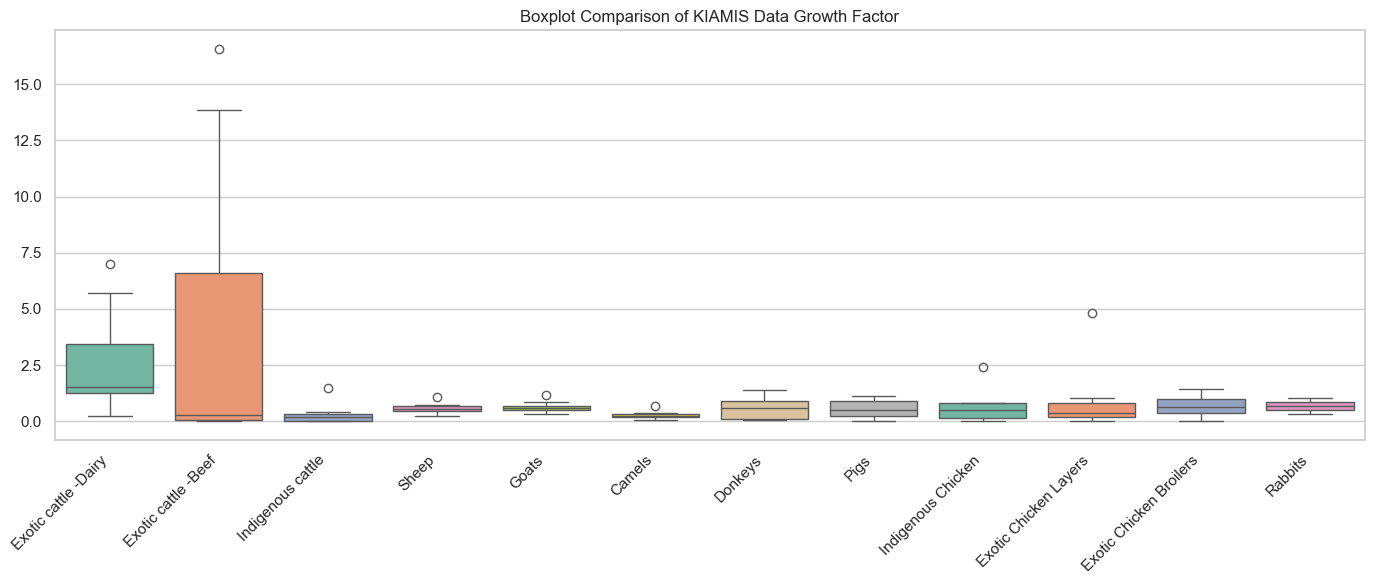

In [3]:
# Growth Factor Distribution of KIAMIS Data

# Your data as a list of lists (replace #DIV/0! with np.nan)
kiamis_data = [
    [1.47, 0.10, 0.40, 0.49, 0.32, 0.20, 1.37, 0.84, 0.48, 0.25, 0.52],
    [5.72, 16.57, 0.00, 0.70, 0.57, 0.33, 0.78, 0.29, 0.17, 1.04, 1.14],
    [2.66, 13.87, 0.00, 0.51, 0.49, 0.06, 0.75, 0.11, 0.03, 0.02, 0.72],
    [1.41, 0.04, 0.28, 0.68, 0.61, 0.23, 1.29, 0.99, 0.82, 0.72, 1.44],
    [1.54, 4.17, 0.00, 1.07, 1.17, 0.21, 0.11, 1.11, 0.79, 0.23, 0.07, 1.03],
    [6.99, 0.41, 1.46, 0.54, 0.84, 0.66, 0.06, 0.40, 0.09, 0.07, 0.00],
    [0.25, 0.02, 0.25, 0.22, 0.60, 0.38, 0.06, 0.00, 2.42, 4.82, 0.96, 0.31],
    [0.78, 0.05, 0.08, 0.42, 0.46, 0.08, 0.44, 0.56, 0.49, 0.49, 0.47]
]

kiamis_columns = [
    'Exotic cattle -Dairy', 'Exotic cattle -Beef', 'Indigenous cattle',
    'Sheep', 'Goats', 'Camels', 'Donkeys', 'Pigs',
    'Indigenous Chicken', 'Exotic Chicken Layers',
    'Exotic Chicken Broilers', 'Rabbits'
]

# Create DataFrame
kiamis_df = pd.DataFrame(kiamis_data, columns=kiamis_columns)

# Set plot style
sns.set(style="whitegrid")

# Create boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=kiamis_df, palette='Set2')

plt.xticks(rotation=45, ha='right')
plt.title('Boxplot Comparison of KIAMIS Data Growth Factor')
plt.tight_layout()
plt.show()

In [4]:
# Calculate mean and median
summary_stats_kiamis = pd.DataFrame({
    "Mean": kiamis_df.mean(skipna=True),
    "Median": kiamis_df.median(skipna=True)
}).round(2)

summary_stats_kiamis.head(len(summary_stats_kiamis))

,Mean,Median
Exotic cattle -Dairy,2.60,1.50
Exotic cattle -Beef,4.40,0.26
Indigenous cattle,0.31,0.16
Sheep,0.58,0.52
Goats,0.63,0.58
Camels,0.27,0.22
Donkeys,0.61,0.60
Pigs,0.54,0.48
Indigenous Chicken,0.66,0.48
Exotic Chicken Layers,0.96,0.37


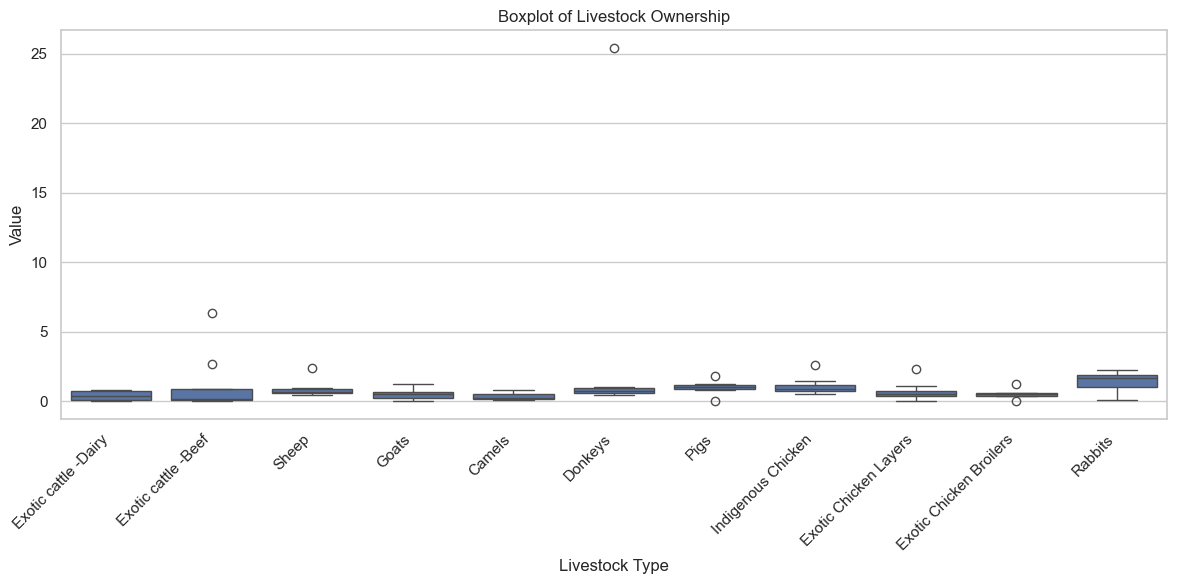

In [5]:
# Growth Factor Distribution of KLMP Data
# KLMP Dataset 
klmp_data = [
    [0.70, 0.22, 0.68, 0.26, None, 0.83, 1.83, 0.83, 0.59, 0.59, 1.73],
    [0.54, 0.27, 2.40, 0.20, None, 0.97, 1.01, 1.06, 0.60, 0.62, 1.85],
    [0.24, 0.13, 0.61, 0.51, None, 0.64, 1.01, 0.73, 0.48, 0.37, 1.02],
    [0.86, 0.08, 0.65, 0.57, None, 0.56, 1.02, 0.73, 0.36, 0.58, 1.65],
    [0.00, 0.00, 0.91, 1.29, 0.22, 25.42, 1.29, 1.50, 0.00, 0.00, 2.04],
    [0.08, 2.67, 0.47, 0.06, 0.14, 0.60, None, 0.96, 1.15, 0.37, 0.09],
    [0.09, 6.36, 0.95, 1.09, 0.81, 1.05, 0.03, 2.59, 2.34, 1.23, 2.23],
    [0.86, 0.10, 0.56, 0.57, None, 0.49, 0.84, 0.51, 0.36, 0.43, 1.03]
]

# Column names
klmp_columns = [
    "Exotic cattle -Dairy", "Exotic cattle -Beef", "Sheep", "Goats", "Camels",
    "Donkeys", "Pigs", "Indigenous Chicken", "Exotic Chicken Layers",
    "Exotic Chicken Broilers", "Rabbits"
]

# Create DataFrame
klmp_df = pd.DataFrame(klmp_data, columns=klmp_columns)

# Reshape the data to long format
df_long = klmp_df.melt(var_name="Livestock Type", value_name="Value")

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Livestock Type", y="Value", data=df_long)
plt.xticks(rotation=45, ha="right")
plt.title("Boxplot of Livestock Ownership")
plt.tight_layout()
plt.show()


In [6]:
# Calculate mean and median
summary_stats_klmp = pd.DataFrame({
    "Mean": klmp_df.mean(skipna=True),
    "Median": klmp_df.median(skipna=True)
}).round(2)

summary_stats_klmp.head(len(summary_stats_klmp))

,Mean,Median
Exotic cattle -Dairy,0.42,0.39
Exotic cattle -Beef,1.23,0.18
Sheep,0.90,0.66
Goats,0.57,0.54
Camels,0.39,0.22
Donkeys,3.82,0.74
Pigs,1.00,1.01
Indigenous Chicken,1.11,0.90
Exotic Chicken Layers,0.73,0.53
Exotic Chicken Broilers,0.52,0.50


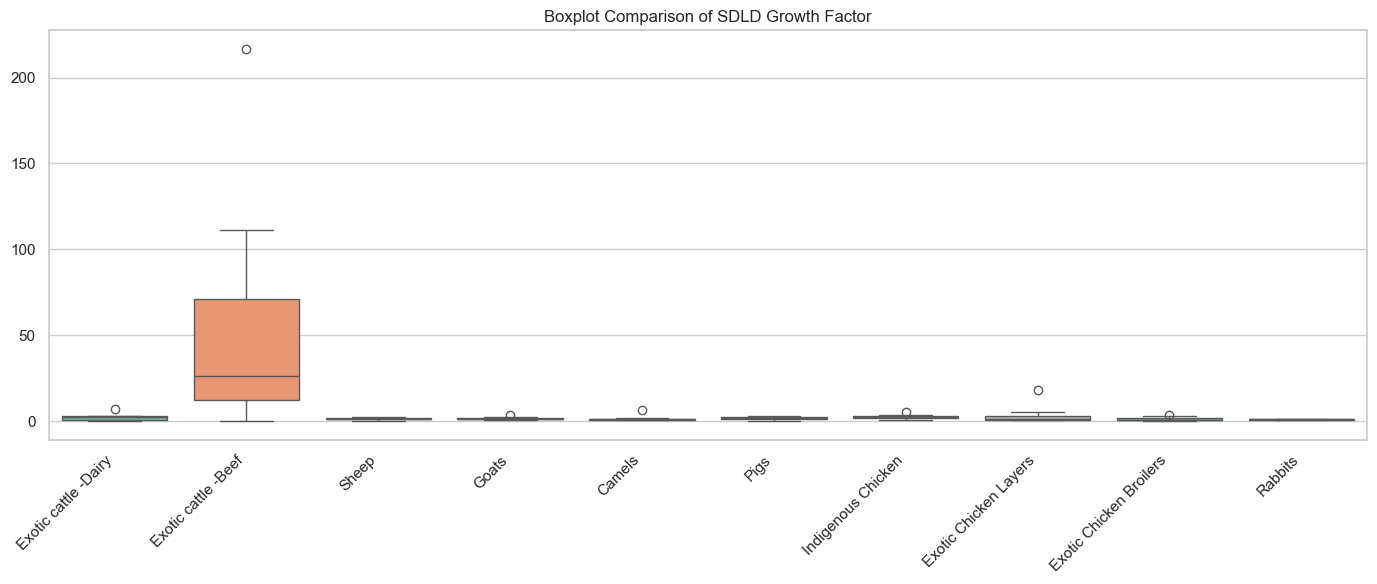

In [7]:
# SDLD
# Dataset with '#DIV/0!' replaced by np.nan and 'Donkeys' removed
data = [
    [2.96, 29.34, 1.81, 1.45, 1.14, 2.62, 0.77, 0.78, 3.14],
    [3.06, 57.76, 2.28, 1.32, 1.51, 2.65, 1.96, 0.93, 1.14],
    [1.22, 111.36, 1.71, 2.52, 1.43, 1.39, 2.87, 5.18, 3.42],
    [2.38, 1.20, 1.19, 1.64, 1.73, 1.66, 2.06, 0.87, 1.07],
    [7.24, 23.65, 2.33, 3.77, 6.26, 1.54, 2.52, 0.93, 0.50, 1.29],
    [0.02, 216.58, 0.38, 0.50, 0.60, 2.96, 5.35, 17.93, 0.05],
    [0.03, 16.01, 0.85, 0.84, 0.85, 0.00, 3.56, 2.59, 0.45, 0.84],
    [2.04, 0.19, 1.05, 1.19, 0.86, 1.06, 0.78, 1.42, 0.70]
]

columns = [
    'Exotic cattle -Dairy', 'Exotic cattle -Beef', 'Sheep', 'Goats',
    'Camels', 'Pigs', 'Indigenous Chicken', 'Exotic Chicken Layers',
    'Exotic Chicken Broilers', 'Rabbits'
]

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Set seaborn style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, palette='Set2')

# Customize chart
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot Comparison of SDLD Growth Factor')
plt.tight_layout()

# Show plot
plt.show()


In [8]:
# Calculate mean and median
summary_stats = pd.DataFrame({
    "Mean": df.mean(skipna=True),
    "Median": df.median(skipna=True)
}).round(2)

print(summary_stats)

                          Mean  Median
Exotic cattle -Dairy      2.37    2.21
Exotic cattle -Beef      57.01   26.49
Sheep                     1.45    1.45
Goats                     1.65    1.38
Camels                    1.80    1.28
Pigs                      1.74    1.60
Indigenous Chicken        2.48    2.29
Exotic Chicken Layers     3.83    1.18
Exotic Chicken Broilers   1.31    0.88
Rabbits                   1.06    1.06


#### Herd Structure Analysis

In [9]:
# Set folder path
folder_path = "C:/Users/user/OneDrive/Documents/Tasha/MOL/kiamis_data"  
file_prefix = "export_"         

# Get matching CSV files
file_pattern = os.path.join(folder_path, f'{file_prefix}*.csv')
csv_files = glob.glob(file_pattern)

# Store all DataFrames in a dictionary
kiamis_dfs = {}

# Loop to read and name each DataFrame
for file in csv_files:
    filename = os.path.basename(file)             
    name_part = filename.replace('.csv', '')      
    last_word = name_part.split('_')[-1] 

    try:
        df = pd.read_csv(file, encoding='utf-8')  # try default first
    except UnicodeDecodeError:
        print(f"⚠️ UTF-8 failed for: {filename} — trying 'ISO-8859-1' instead.")
        df = pd.read_csv(file, encoding='ISO-8859-1')  # fallback encoding
    
    kiamis_dfs[last_word] = df                           

# Show shapes
print("\nDataFrame Shapes:")
for name, df in kiamis_dfs.items():
    print(f"{name}: {df.shape}")


⚠️ UTF-8 failed for: export_LIVESTOCK_DETAILS_Data_Kiambu.csv — trying 'ISO-8859-1' instead.
⚠️ UTF-8 failed for: export_LIVESTOCK_DETAILS_Data_Kilifi.csv — trying 'ISO-8859-1' instead.
⚠️ UTF-8 failed for: export_LIVESTOCK_DETAILS_Data_Kitui.csv — trying 'ISO-8859-1' instead.
⚠️ UTF-8 failed for: export_LIVESTOCK_DETAILS_Data_Kwale.csv — trying 'ISO-8859-1' instead.

DataFrame Shapes:
Baringo: (188490, 19)
Bomet: (218294, 19)
Bungoma: (254223, 19)
Busia: (871913, 19)
ElgeyoMarakwet: (406261, 19)
Embu: (112063, 19)
Garissa: (220618, 19)
Homabay: (129614, 19)
Isiolo: (51660, 19)
Kajiado: (625765, 19)
Kakamega: (293210, 19)
Kericho: (158788, 19)
Kiambu: (87409, 19)
Kilifi: (159049, 19)
Kirinyaga: (131938, 19)
Kisii: (212853, 19)
Kisumu: (201350, 19)
Kitui: (524764, 19)
Kwale: (129728, 19)
Laikipia: (526436, 19)
Lamu: (76215, 19)
Machakos: (646786, 19)
Makueni: (289094, 19)
Mandera: (550113, 19)
Marsabit: (107380, 19)
Meru: (250419, 19)
Migori: (163795, 19)
Mombasa: (0, 19)
Muranga: (1634

In [10]:
# Check column consistency
column_counts = [df.shape[1] for df in kiamis_dfs.values()]
all_same_columns = all(count == column_counts[0] for count in column_counts)

print("\nDo all DataFrames have the same number of columns?")
print("✅ Yes" if all_same_columns else "❌ No")



Do all DataFrames have the same number of columns?
✅ Yes


In [11]:
# Create a summary list
summary = []

for name, df in kiamis_dfs.items():
    summary.append({
        'DataFrame Name': name,
        'Rows': df.shape[0],
        'Columns': df.shape[1]
    })

summary_dfs = pd.DataFrame(summary)
summary_dfs.head(len(summary_dfs))

,DataFrame Name,Rows,Columns
0,Baringo,188490,19
1,Bomet,218294,19
2,Bungoma,254223,19
3,Busia,871913,19
4,ElgeyoMarakwet,406261,19
5,Embu,112063,19
6,Garissa,220618,19
7,Homabay,129614,19
8,Isiolo,51660,19
9,Kajiado,625765,19


In [12]:
# Total number of files imported
print(f"\nTotal number of files imported: {len(kiamis_dfs)}")


Total number of files imported: 47


In [13]:
# Filter out empty DataFrames 
non_empty_dfs = [df for df in kiamis_dfs.values() if df.shape[0] > 0]

# Merge all non-empty DataFrames
merged_kiamis = pd.concat(non_empty_dfs, ignore_index=True)

print(f"\nMerged DataFrame shape: {merged_kiamis.shape}")


Merged DataFrame shape: (12105531, 19)


#### EDA

In [14]:
# View the data
merged_kiamis.head()

,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
0,1,BARINGO,KOIBATEK,LEMBUS,ELDAMA RAVINE,TORONGO,TUGUMOI,TIRIPKATOI,NaN,0.122086,35.620780,Freisian,1-2 years,0,1.0,1,Rotational grazing/paddocking,Cattle,Exotic Dairy Cattle
1,1,BARINGO,MARIGAT,IICHAMUS,BARINGO SOUTH,MARIGAT,ILCHAMUS,KAILER,keper,0.412457,36.067662,Other Sheep,2-6 months,5,7.0,12,Communal grazing,Sheep,Hair Sheep
2,2,BARINGO,MARIGAT,IICHAMUS,BARINGO SOUTH,MARIGAT,ILCHAMUS,KAILER,keper,0.412457,36.067662,Other Sheep,2-4yrs,5,7.0,12,Communal grazing,Sheep,Hair Sheep
3,3,BARINGO,MARIGAT,IICHAMUS,BARINGO SOUTH,MARIGAT,ILCHAMUS,KAILER,keper,0.412457,36.067662,Other Sheep,Less than 3 weeks,10,5.0,15,Communal grazing,Sheep,Hair Sheep
4,4,BARINGO,MARIGAT,IICHAMUS,BARINGO SOUTH,MARIGAT,ILCHAMUS,KAILER,keper,0.412457,36.067662,Blackhead,Less than 3 weeks,5,2.0,7,Communal grazing,Sheep,Hair Sheep


In [15]:
# data types for each column
merged_kiamis.dtypes

record_identifier            int64
county                      object
subcounty                   object
ward                        object
constituency                object
division                    object
location                    object
sublocation                 object
village_name                object
latitude                   float64
longitude                  float64
livestock_name              object
livestock_detail            object
male_livestock_count        object
female_livestock_count     float64
total_livestock_count        int64
production_system           object
livestock_category          object
livestock_sub_category      object
dtype: object

In [16]:
#missing values per column
total_rows = merged_kiamis.shape[0]

# Create a summary DataFrame
missing_info = pd.DataFrame({
    'Missing Values': merged_kiamis.isnull().sum(),
    'Percentage (%)': (merged_kiamis.isnull().sum() / total_rows * 100).round(2)
})

# Filter to show only columns with missing values
missing_info = missing_info[missing_info['Missing Values'] > 0]

print("\n📊 Missing Values Summary:")
if missing_info.empty:
    print("✅ No missing values found.")
else:
    print(missing_info)



📊 Missing Values Summary:
                         Missing Values  Percentage (%)
ward                                  4            0.00
village_name                    7196472           59.45
livestock_name                     5772            0.05
male_livestock_count            5897986           48.72
female_livestock_count          6483935           53.56
livestock_sub_category          4812392           39.75


In [17]:
cols_to_check = ['male_livestock_count', 'female_livestock_count']

# Filter rows with missing values in either column
missing_livestock_df = merged_kiamis[merged_kiamis[cols_to_check].isnull().any(axis=1)]

# Show only the first 10 rows
print(f"\n🔍 First 10 rows with missing values in {cols_to_check}:")
missing_livestock_df.head(10)



🔍 First 10 rows with missing values in ['male_livestock_count', 'female_livestock_count']:


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
661007,1,Busia,Teso North,Ang'urai South,Teso North,Angurai,Katakwa,Akolong,NaN,0.691093,34.376593,Other cattle,Immature Males > 1 year old and <3 years old,NaN,NaN,1,Semi Zero grazing,Cattle,Dairy
661008,2,Busia,Teso North,Ang'urai South,Teso North,Angurai,Katakwa,Akolong,NaN,0.691093,34.376593,Other cattle,Immature Males > 1 year old and <3 years old,NaN,NaN,1,Tethering,Cattle,Dairy
661009,3,Busia,Teso North,Ang'urai South,Teso North,Angurai,Katakwa,Akolong,NaN,0.691093,34.376593,Other cattle,Calves <1 year old,NaN,NaN,1,Semi Zero grazing,Cattle,Dairy
661010,4,Busia,Teso North,Ang'urai South,Teso North,Angurai,Katakwa,Akolong,NaN,0.691093,34.376593,Other cattle,Calves <1 year old,NaN,NaN,1,Tethering,Cattle,Dairy
661011,5,Busia,Teso North,Ang'urai South,Teso North,Angurai,Katakwa,Akolong,NaN,0.691093,34.376593,Other cattle,Dairy Milked Dairy cows that have calved at le...,NaN,NaN,2,Semi Zero grazing,Cattle,Dairy
661012,6,Busia,Teso North,Ang'urai South,Teso North,Angurai,Katakwa,Akolong,NaN,0.691093,34.376593,Other cattle,Dairy Milked Dairy cows that have calved at le...,NaN,NaN,2,Tethering,Cattle,Dairy
661013,7,Busia,Teso North,Ang'urai South,Teso North,Angurai,Katakwa,Akolong,NaN,0.691093,34.376593,Other cattle,Heifer Female cattle > 1 year old that have n...,NaN,NaN,2,Semi Zero grazing,Cattle,Dairy
661014,8,Busia,Teso North,Ang'urai South,Teso North,Angurai,Katakwa,Akolong,NaN,0.691093,34.376593,Other cattle,Heifer Female cattle > 1 year old that have n...,NaN,NaN,2,Tethering,Cattle,Dairy
661015,9,Busia,Teso North,Ang'urai South,Teso North,Angurai,Katakwa,Akolong,NaN,0.691093,34.376593,Other cattle,Mature Males Bulls and oxen > 3 years old,NaN,NaN,0,Semi Zero grazing,Cattle,Dairy
661016,10,Busia,Teso North,Ang'urai South,Teso North,Angurai,Katakwa,Akolong,NaN,0.691093,34.376593,Other cattle,Mature Males Bulls and oxen > 3 years old,NaN,NaN,0,Tethering,Cattle,Dairy


In [18]:
# Groupby the missing values per county
county_col = 'county'  # Make sure this is the exact name of your county column

# Get missing values and percentage
county_totals = merged_kiamis[county_col].value_counts().sort_index()
missing_counts = merged_kiamis[cols_to_check + [county_col]].isnull().groupby(merged_kiamis[county_col]).sum()
missing_percent = (missing_counts.div(county_totals, axis=0) * 100).round(2)

# Combine counts and percentages into one DataFrame
missing_summary = missing_counts.copy()
for col in cols_to_check:
    missing_summary[f'{col}_pct'] = missing_percent[col]

# Show only rows where there is at least one missing value in either column
missing_only = missing_summary[
    (missing_summary['male_livestock_count'] > 0) |
    (missing_summary['female_livestock_count'] > 0)
]

print("\n📍 Counties with Missing Livestock Data:")
missing_only.head(len(missing_only))


📍 Counties with Missing Livestock Data:


,male_livestock_count,female_livestock_count,county,male_livestock_count_pct,female_livestock_count_pct
county,,,,,
Busia,769643,871913,0,88.27,100.0
Elgeyo/Marakwet,383696,406261,0,94.45,100.0
Kajiado,535781,625765,0,85.62,100.0
Laikipia,490551,526436,0,93.18,100.0
Lamu,67590,76215,0,88.68,100.0
Machakos,561756,646786,0,86.85,100.0
Mandera,519418,550113,0,94.42,100.0
Nakuru,602059,612094,0,98.36,100.0
Siaya,386693,465423,0,83.08,100.0


In [19]:
# Check for duplicated rows
num_duplicates = merged_kiamis.duplicated().sum()
print(f"\n🔍 Number of duplicated rows: {num_duplicates}")



🔍 Number of duplicated rows: 10162


In [20]:
# Show duplicated rows (10)
duplicated_rows = merged_kiamis[merged_kiamis.duplicated(keep=False)]
duplicated_rows.head(10)

,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
38596,1,BARINGO,BARINGO CENTRAL,SACHO,BARINGO CENTRAL,SACHO,SACHO MOSOP,KESETAN,KESETAN,0.369542,35.773588,Cross breed Cattle,2-4yrs,0,1.0,1,Free Range,Cattle,Dual purpose Cattle
38786,1,BARINGO,BARINGO CENTRAL,SACHO,BARINGO CENTRAL,SACHO,SACHO MOSOP,KESETAN,KESETAN,0.369542,35.773588,Cross breed Cattle,2-4yrs,0,1.0,1,Free Range,Cattle,Dual purpose Cattle
106454,3,BARINGO,TIATY EAST,Loiyamorock,TIATY,MONDI,PAKA,CHEMORIL,tuwot,0.944363,36.126965,Small East African Goats,4yrs or older,4,3.0,7,Free Range,Goats,Meat goats (Chevon)
106465,1,BARINGO,TIATY EAST,Loiyamorock,TIATY,MONDI,PAKA,CHEMORIL,tuwot,0.944363,36.126965,Small East African Goats,2-4yrs,4,2.0,6,Free Range,Goats,Meat goats (Chevon)
106467,3,BARINGO,TIATY EAST,Loiyamorock,TIATY,MONDI,PAKA,CHEMORIL,tuwot,0.944363,36.126965,Small East African Goats,4yrs or older,4,3.0,7,Free Range,Goats,Meat goats (Chevon)
106468,1,BARINGO,TIATY EAST,Loiyamorock,TIATY,MONDI,PAKA,CHEMORIL,tuwot,0.944363,36.126965,Small East African Goats,2-4yrs,4,2.0,6,Free Range,Goats,Meat goats (Chevon)
182318,2,BARINGO,KOIBATEK,RAVINE,ELDAMA RAVINE,ELDAMA RAVINE,KABIYET,KABIYET,Luita,0.000000,0.000000,Freisian,6-12 months,0,1.0,1,Semi zero grazing,Cattle,Exotic Dairy Cattle
182346,1,BARINGO,KOIBATEK,RAVINE,ELDAMA RAVINE,ELDAMA RAVINE,KABIYET,KABIYET,Luita,0.000000,0.000000,Freisian,2-4yrs,0,1.0,1,Semi zero grazing,Cattle,Exotic Dairy Cattle
182347,2,BARINGO,KOIBATEK,RAVINE,ELDAMA RAVINE,ELDAMA RAVINE,KABIYET,KABIYET,Luita,0.000000,0.000000,Freisian,6-12 months,0,1.0,1,Semi zero grazing,Cattle,Exotic Dairy Cattle
182373,1,BARINGO,KOIBATEK,RAVINE,ELDAMA RAVINE,ELDAMA RAVINE,KABIYET,KABIYET,Luita,0.000000,0.000000,Freisian,6-12 months,0,2.0,2,Communal grazing,Cattle,Exotic Dairy Cattle


In [21]:
# Group duplicated rows by county
duplicated_by_county = duplicated_rows[county_col].value_counts().reset_index()
duplicated_by_county.columns = ['county', 'duplicate_count']

print("\n📍 Duplicated Rows by County:")
duplicated_by_county.head(len(duplicated_by_county))


📍 Duplicated Rows by County:


,county,duplicate_count
0,BOMET,1925
1,Mandera,1732
2,Kajiado,1507
3,NANDI,1488
4,MERU,1327
5,KISII,1002
6,NAROK,887
7,MIGORI,883
8,NYANDARUA,872
9,MAKUENI,824


In [22]:
# drop duplicates and compare dfs before and after dropping
initial_counts = merged_kiamis.groupby('county').size().reset_index(name='initial_count')

# Drop the duplicates
merged_kiamis_clean = merged_kiamis.drop_duplicates()

# 3. Count values per county in the new DataFrame
final_counts = merged_kiamis_clean.groupby('county').size().reset_index(name='final_count')

# 4. Create a comparison DataFrame
comparison_df = pd.merge(initial_counts, final_counts, on='county', how='outer')

print("\n📊 Comparison of Value Counts per County (Before and After Dropping Duplicates):")
comparison_df.head(len(comparison_df))


📊 Comparison of Value Counts per County (Before and After Dropping Duplicates):


,county,initial_count,final_count
0,BARINGO,188490,188483
1,BOMET,218294,217104
2,BUNGOMA,254223,254080
3,Busia,871913,871905
4,EMBU,112063,112049
5,Elgeyo/Marakwet,406261,406261
6,GARISSA,220618,220587
7,HOMABAY,129614,129168
8,ISIOLO,51660,51605
9,KAKAMEGA,293210,293138


In [23]:
#Shape of new df
merged_kiamis_clean.shape

(12095369, 19)

In [24]:
#Recheck the dtypes
merged_kiamis_clean.dtypes

record_identifier            int64
county                      object
subcounty                   object
ward                        object
constituency                object
division                    object
location                    object
sublocation                 object
village_name                object
latitude                   float64
longitude                  float64
livestock_name              object
livestock_detail            object
male_livestock_count        object
female_livestock_count     float64
total_livestock_count        int64
production_system           object
livestock_category          object
livestock_sub_category      object
dtype: object

In [25]:
# Set the option to display all rows
pd.set_option('display.max_rows', None)

#See value counts of male livestock column
merged_kiamis_clean.value_counts(['male_livestock_count'])

male_livestock_count          
0                                 2320192
1                                 1348742
2                                  847468
3                                  300571
 bulls and steers                  234257
5                                  204412
4                                  179132
 calved (dry cows)                 117142
 calved (in milk/being milked)     117141
 not yet calved                    117126
6                                   74648
10                                  58555
8                                   51302
7                                   38454
12                                  29255
9                                   23429
15                                  18396
20                                  16515
11                                  12031
14                                   9816
13                                   8442
25                                   6772
18                                   5379
30 

In [26]:
# Check the row values with string values in the male livestock count column
column_to_check = 'male_livestock_count'

# Replace with the list of string values you want to find
string_values_to_find = [796034281, ' not yet calved', ' calved (in milk/being milked)', ' calved (dry cows)', ' bulls and steers']

for string_value in string_values_to_find:
    # Filter the DataFrame for rows where the column contains the current string value
    found_rows = merged_kiamis_clean[merged_kiamis_clean[column_to_check] == string_value]

    if not found_rows.empty:
        print(f"\nFirst 5 rows containing the string value '{string_value}' in column '{column_to_check}':")
        display(found_rows.head())
    else:
        print(f"\nNo rows found with the string value '{string_value}' in column '{column_to_check}'.")

# Optionally, reset the display width to default
pd.reset_option('display.width')
pd.reset_option('display.max_columns')


First 5 rows containing the string value '796034281' in column 'male_livestock_count':


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
7494996,3,MIGORI,KURIA EAST,NTIMARU WEST,KURIA EAST,KWIHO,BWIREGE EAST,GAIRORO,Gurani B,-1.349851,34.709732,Other Sheep,6-12 months,796034281,0.0,796034281,Free Range,Sheep,Hair Sheep



First 5 rows containing the string value ' not yet calved' in column 'male_livestock_count':


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
661053,13,Busia,Busia,Matayos South,Matayos,Matayos,Nasewa,Buyama,NaN,0.380313,34.233164,Zebu cattle,Heifer Beef 1 - 2 years old,not yet calved,NaN,0,Free range,Cattle,Beef (indigenous and Exotic)
661054,14,Busia,Busia,Matayos South,Matayos,Matayos,Nasewa,Buyama,NaN,0.380313,34.233164,Zebu cattle,Heifer Beef 1 - 2 years old,not yet calved,NaN,0,Tethering,Cattle,Beef (indigenous and Exotic)
661081,3,Busia,Butula,Marachi North,Butula,Butula,Marachi East,Tingolo,NaN,0.347367,34.368365,Zebu cattle,Heifer Beef 1 - 2 years old,not yet calved,NaN,0,Tethering,Cattle,Beef (indigenous and Exotic)
661194,3,Busia,Samia,Nangina,Funyula,Funyula,Nangosia,Bukhulungu,NaN,0.244964,34.091535,Boran cattle,Heifer Beef 1 - 2 years old,not yet calved,NaN,0,Tethering,Cattle,Beef (indigenous and Exotic)
661221,11,Busia,Butula,Kingandole,Butula,Butula,Bujumba,Ikonzo,NaN,0.338414,34.220382,Zebu cattle,Heifer Beef 1 - 2 years old,not yet calved,NaN,0,Communal grazing,Cattle,Beef (indigenous and Exotic)



First 5 rows containing the string value ' calved (in milk/being milked)' in column 'male_livestock_count':


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
661047,7,Busia,Busia,Matayos South,Matayos,Matayos,Nasewa,Buyama,NaN,0.380313,34.233164,Zebu cattle,Mature Females Beef Cows > 2 years old,calved (in milk/being milked),NaN,1,Free range,Cattle,Beef (indigenous and Exotic)
661048,8,Busia,Busia,Matayos South,Matayos,Matayos,Nasewa,Buyama,NaN,0.380313,34.233164,Zebu cattle,Mature Females Beef Cows > 2 years old,calved (in milk/being milked),NaN,1,Tethering,Cattle,Beef (indigenous and Exotic)
661083,5,Busia,Butula,Marachi North,Butula,Butula,Marachi East,Tingolo,NaN,0.347367,34.368365,Zebu cattle,Mature Females Beef Cows > 2 years old,calved (in milk/being milked),NaN,0,Tethering,Cattle,Beef (indigenous and Exotic)
661196,5,Busia,Samia,Nangina,Funyula,Funyula,Nangosia,Bukhulungu,NaN,0.244964,34.091535,Boran cattle,Mature Females Beef Cows > 2 years old,calved (in milk/being milked),NaN,1,Tethering,Cattle,Beef (indigenous and Exotic)
661213,3,Busia,Butula,Kingandole,Butula,Butula,Bujumba,Ikonzo,NaN,0.338414,34.220382,Zebu cattle,Mature Females Beef Cows > 2 years old,calved (in milk/being milked),NaN,0,Communal grazing,Cattle,Beef (indigenous and Exotic)



First 5 rows containing the string value ' calved (dry cows)' in column 'male_livestock_count':


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
661045,5,Busia,Busia,Matayos South,Matayos,Matayos,Nasewa,Buyama,NaN,0.380313,34.233164,Zebu cattle,Mature Females Cows > 2 years old,calved (dry cows),NaN,0,Free range,Cattle,Beef (indigenous and Exotic)
661046,6,Busia,Busia,Matayos South,Matayos,Matayos,Nasewa,Buyama,NaN,0.380313,34.233164,Zebu cattle,Mature Females Cows > 2 years old,calved (dry cows),NaN,0,Tethering,Cattle,Beef (indigenous and Exotic)
661082,4,Busia,Butula,Marachi North,Butula,Butula,Marachi East,Tingolo,NaN,0.347367,34.368365,Zebu cattle,Mature Females Cows > 2 years old,calved (dry cows),NaN,0,Tethering,Cattle,Beef (indigenous and Exotic)
661195,4,Busia,Samia,Nangina,Funyula,Funyula,Nangosia,Bukhulungu,NaN,0.244964,34.091535,Boran cattle,Mature Females Cows > 2 years old,calved (dry cows),NaN,0,Tethering,Cattle,Beef (indigenous and Exotic)
661223,13,Busia,Butula,Kingandole,Butula,Butula,Bujumba,Ikonzo,NaN,0.338414,34.220382,Zebu cattle,Mature Females Cows > 2 years old,calved (dry cows),NaN,0,Communal grazing,Cattle,Beef (indigenous and Exotic)



First 5 rows containing the string value ' bulls and steers' in column 'male_livestock_count':


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
661041,1,Busia,Busia,Matayos South,Matayos,Matayos,Nasewa,Buyama,NaN,0.380313,34.233164,Zebu cattle,Mature Males Beef > 2 years old,bulls and steers,NaN,0,Free range,Cattle,Beef (indigenous and Exotic)
661042,2,Busia,Busia,Matayos South,Matayos,Matayos,Nasewa,Buyama,NaN,0.380313,34.233164,Zebu cattle,Mature Males Beef > 2 years old,bulls and steers,NaN,0,Tethering,Cattle,Beef (indigenous and Exotic)
661049,9,Busia,Busia,Matayos South,Matayos,Matayos,Nasewa,Buyama,NaN,0.380313,34.233164,Zebu cattle,Young Males 1 - 2 years old,bulls and steers,NaN,0,Free range,Cattle,Beef (indigenous and Exotic)
661050,10,Busia,Busia,Matayos South,Matayos,Matayos,Nasewa,Buyama,NaN,0.380313,34.233164,Zebu cattle,Young Males 1 - 2 years old,bulls and steers,NaN,0,Tethering,Cattle,Beef (indigenous and Exotic)
661084,6,Busia,Butula,Marachi North,Butula,Butula,Marachi East,Tingolo,NaN,0.347367,34.368365,Zebu cattle,Young Males 1 - 2 years old,bulls and steers,NaN,2,Tethering,Cattle,Beef (indigenous and Exotic)


In [27]:
# Set the option to display all rows
pd.set_option('display.max_rows', None)

#See value counts of male livestock column
merged_kiamis_clean.value_counts(['total_livestock_count'])

total_livestock_count
 0                       3367253
 1                       2209408
 2                       1651512
 3                       1012687
 5                        695108
 4                        645853
 6                        391040
 10                       316822
 8                        270488
 7                        269187
 9                        136733
 12                       118791
 11                       110044
 15                       109292
 20                        96639
 13                        69145
 14                        59284
 30                        43019
 17                        40719
 16                        39755
 18                        36152
 25                        34366
 21                        22421
 22                        22149
 19                        20581
 50                        18704
 40                        18294
 23                        17642
 24                        14264
 35                  

In [28]:
#check values where livestock_stock is more than 1m
livestock_over_1m = merged_kiamis_clean[merged_kiamis_clean['total_livestock_count'] > 1000000]

print("\nRows where male_livestock_count is greater than 1M:")
livestock_over_1m.head(len(livestock_over_1m))


Rows where male_livestock_count is greater than 1M:


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
281993,1,BOMET,KONOIN,EMBOMOS,KONOIN,CHEPTALAL,CHEPTALAL,TABOINO,NaN,-0.610220,35.404611,Chicken -Indigenous,1-2 years,2,2.028739e+09,2028739491,Free Range,Poultry,Poultry
4331405,6,KITUI,KITUI WEST,KAUWI,KITUI WEST,KAUWI,MUTANDA,SANGALA,NaN,-1.236453,37.844730,Chicken -Indigenous,2-6 months,4,8.275555e+07,82755558,Free Range,Poultry,Poultry
5523634,1,Lamu,Lamu West,Mkunumbi,Lamu West,Mkunumbi,Majembeni,Majembeni,NaN,-2.301974,40.569869,Somali Goat,Goat less 12mnths female 6-12 months,NaN,NaN,2538271,Ranching,Goat,NaN
5549122,1,Lamu,Lamu West,Mkunumbi,Lamu West,Mkunumbi,Majembeni,Majembeni,NaN,-2.322113,40.584162,Zebu cattle,Calves (males and females): < 1 year old,NaN,NaN,72785393,Tethering,Cattle,Beef (indigenous and Exotic)
7494996,3,MIGORI,KURIA EAST,NTIMARU WEST,KURIA EAST,KWIHO,BWIREGE EAST,GAIRORO,Gurani B,-1.349851,34.709732,Other Sheep,6-12 months,796034281,0.000000e+00,796034281,Free Range,Sheep,Hair Sheep


In [29]:
#check values where livestock_stock less than 0
livestock_negative = merged_kiamis_clean[merged_kiamis_clean['total_livestock_count'] < 0]

print("\nShape of data with negative livestock count:", livestock_negative.shape )

print("\nRows where male_livestock_count is less than 0:")
livestock_negative.head(len(livestock_negative))


Shape of data with negative livestock count: (22, 19)

Rows where male_livestock_count is less than 0:


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
1094065,1,Busia,Samia,Ageng'a Nanguba,Funyula,Funyula,Nanguba,Rumbiye,NaN,0.203472,34.095432,Zebu cattle,Calves (males and females): < 1 year old,NaN,NaN,-5,Communal grazing,Cattle,Beef (indigenous and Exotic)
1094066,2,Busia,Samia,Ageng'a Nanguba,Funyula,Funyula,Nanguba,Rumbiye,NaN,0.203472,34.095432,Zebu cattle,Calves (males and females): < 1 year old,NaN,NaN,-5,Tethering,Cattle,Beef (indigenous and Exotic)
1781781,1,Elgeyo/Marakwet,Keiyo North,Kamariny,Keiyo North,Tambach,Mutei,Chelingwa,NaN,0.588351,35.484585,Improved Kienyeji,Chicks less_3wks,NaN,NaN,-3,Free range,Poultry,NaN
1781782,2,Elgeyo/Marakwet,Keiyo North,Kamariny,Keiyo North,Tambach,Mutei,Chelingwa,NaN,0.588351,35.484585,Improved Kienyeji,Chicks less_3wks,NaN,NaN,-3,Deep litter system,Poultry,NaN
1803246,1,Elgeyo/Marakwet,Keiyo North,Kapchemutwa,Keiyo North,Kapchemutwa,Kamoi,Singore,NaN,0.702766,35.516302,Friesian cattle,Calves (males and females): < 1 year old,NaN,NaN,-1,Zero grazing,Cattle,Beef (indigenous and Exotic)
1869851,1,Elgeyo/Marakwet,Marakwet West,Cherang'any/Chebororwa,Marakwet West,Chebororwa,Kondabilet,Kapchebit,NaN,0.933977,35.433832,Indigenous Chicken,Chicks less_3wks,NaN,NaN,-6,Free range,Poultry,NaN
2494127,2,Kajiado,Loitokitok,Kuku,Kajiado South,Central,Kuku,Inkisanjani,NaN,-2.899907,37.593103,Zebu cattle,Calves (males and females): < 1 year old,NaN,NaN,-1,Zero grazing,Cattle,Beef (indigenous and Exotic)
2714400,3,Kajiado,Loitokitok,Kuku,Kajiado South,Central,Kuku,Inkisanjani,NaN,-2.912206,37.615974,Sahiwal cattle,Heifer Female cattle > 1 year old that have n...,NaN,NaN,-3,Communal grazing,Cattle,Dairy
5194643,13,Laikipia,Nyahururu,Salama,Laikipia West,Marmanet,Salama,Pesi,NaN,0.147407,36.584090,Dorper sheep,Sheep less 12mnths female 6-12 months,NaN,NaN,-1,Communal grazing,Sheep,NaN
5475855,1,Laikipia,Laikipia Central,Ngobit,Laikipia East,Munyaka,Wiyumiririe,Nyakio,NaN,-0.078900,36.589092,Friesian cattle,Dairy Dry Dairy cows that have calved at least...,NaN,NaN,-2,Zero grazing,Cattle,Dairy


In [30]:
# Group by county on number of negative values
livestock_negative_by_county = livestock_negative.groupby('county').size().reset_index(name='negative values')

print("\nCount of Livestock with negative values (Grouped by County):")
livestock_negative_by_county.head(len(livestock_negative_by_county))


Count of Livestock with negative values (Grouped by County):


,county,negative values
0,Busia,2
1,Elgeyo/Marakwet,4
2,Kajiado,2
3,Laikipia,3
4,Machakos,1
5,Mandera,2
6,Nakuru,1
7,Tharaka-Nithi,4
8,West Pokot,3


In [31]:
# Change the negative values to positive values
# Apply the .abs() method to the specified column
merged_kiamis_clean['total_livestock_count'] = merged_kiamis_clean['total_livestock_count'].abs()

#Confirm
livestock_negative_new = merged_kiamis_clean[merged_kiamis_clean['total_livestock_count'] < 0]

print("\nShape of data with negative livestock count:", livestock_negative_new.shape )


Shape of data with negative livestock count: (0, 19)


C:\Users\user\AppData\Local\Temp\ipykernel_15232\2082772684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_kiamis_clean['total_livestock_count'] = merged_kiamis_clean['total_livestock_count'].abs()


In [32]:
#check values where livestock_stock is zero
livestock_zero = merged_kiamis_clean[merged_kiamis_clean['total_livestock_count'] == 0]

# Group by county on zero values
livestock_zero_by_county = livestock_zero.groupby('county').size().reset_index(name='zero values')

print("\nCount of Livestock with zero values (Grouped by County):")
livestock_zero_by_county.head(len(livestock_zero_by_county))


Count of Livestock with zero values (Grouped by County):


,county,zero values
0,Busia,486015
1,Elgeyo/Marakwet,201738
2,Kajiado,278149
3,Laikipia,295499
4,Lamu,42322
5,Machakos,411249
6,Mandera,204659
7,Nakuru,332112
8,Siaya,288742
9,Tharaka-Nithi,301931


In [33]:
livestock_zero.head()

,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
661015,9,Busia,Teso North,Ang'urai South,Teso North,Angurai,Katakwa,Akolong,NaN,0.691093,34.376593,Other cattle,Mature Males Bulls and oxen > 3 years old,NaN,NaN,0,Semi Zero grazing,Cattle,Dairy
661016,10,Busia,Teso North,Ang'urai South,Teso North,Angurai,Katakwa,Akolong,NaN,0.691093,34.376593,Other cattle,Mature Males Bulls and oxen > 3 years old,NaN,NaN,0,Tethering,Cattle,Dairy
661017,11,Busia,Teso North,Ang'urai South,Teso North,Angurai,Katakwa,Akolong,NaN,0.691093,34.376593,Other cattle,Dairy Dry Dairy cows that have calved at least...,NaN,NaN,0,Semi Zero grazing,Cattle,Dairy
661018,12,Busia,Teso North,Ang'urai South,Teso North,Angurai,Katakwa,Akolong,NaN,0.691093,34.376593,Other cattle,Dairy Dry Dairy cows that have calved at least...,NaN,NaN,0,Tethering,Cattle,Dairy
661031,25,Busia,Teso North,Ang'urai South,Teso North,Angurai,Katakwa,Akolong,NaN,0.691093,34.376593,Other sheep,Sheep less 12mnths female 6-12 months,NaN,NaN,0,Tethering,Sheep,NaN


In [34]:
#Change the data type for male livestock count to numeric (string values will be converted to NaN)
merged_kiamis_clean['male_livestock_count'] = pd.to_numeric(merged_kiamis_clean['male_livestock_count'], errors='coerce')

# Display the data type of the column to confirm the conversion
print(merged_kiamis_clean['male_livestock_count'].dtype)

float64


C:\Users\user\AppData\Local\Temp\ipykernel_15232\3951035659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_kiamis_clean['male_livestock_count'] = pd.to_numeric(merged_kiamis_clean['male_livestock_count'], errors='coerce')


In [35]:
# Summary descriptive analytics
merged_kiamis_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
record_identifier,12095369.0,6.140032,7.415772,1.000000,2.000000,3.000000,8.000000,1.660000e+02
latitude,12095369.0,-0.056580,1.671047,-80.803706,-0.879207,-0.039600,0.576510,8.448895e+01
longitude,12095369.0,36.470482,2.896190,-141.447274,34.936215,36.268919,37.658471,1.205906e+02
male_livestock_count,5613832.0,143.992218,335971.213293,0.000000,0.000000,1.000000,2.000000,7.960343e+08
female_livestock_count,5613832.0,382.282761,856954.245283,0.000000,1.000000,3.000000,5.000000,2.028739e+09
total_livestock_count,12095369.0,251.726976,627432.826856,0.000000,0.000000,2.000000,5.000000,2.028739e+09


##### **Herd Structure Numbers**

In [36]:
# Check the df
pd.set_option('display.float_format', '{:.2f}'.format)
merged_kiamis_clean.head()

,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
0,1,BARINGO,KOIBATEK,LEMBUS,ELDAMA RAVINE,TORONGO,TUGUMOI,TIRIPKATOI,NaN,0.12,35.62,Freisian,1-2 years,0.00,1.00,1,Rotational grazing/paddocking,Cattle,Exotic Dairy Cattle
1,1,BARINGO,MARIGAT,IICHAMUS,BARINGO SOUTH,MARIGAT,ILCHAMUS,KAILER,keper,0.41,36.07,Other Sheep,2-6 months,5.00,7.00,12,Communal grazing,Sheep,Hair Sheep
2,2,BARINGO,MARIGAT,IICHAMUS,BARINGO SOUTH,MARIGAT,ILCHAMUS,KAILER,keper,0.41,36.07,Other Sheep,2-4yrs,5.00,7.00,12,Communal grazing,Sheep,Hair Sheep
3,3,BARINGO,MARIGAT,IICHAMUS,BARINGO SOUTH,MARIGAT,ILCHAMUS,KAILER,keper,0.41,36.07,Other Sheep,Less than 3 weeks,10.00,5.00,15,Communal grazing,Sheep,Hair Sheep
4,4,BARINGO,MARIGAT,IICHAMUS,BARINGO SOUTH,MARIGAT,ILCHAMUS,KAILER,keper,0.41,36.07,Blackhead,Less than 3 weeks,5.00,2.00,7,Communal grazing,Sheep,Hair Sheep


In [37]:
#get the number of unique values in live_stock category
merged_kiamis_clean['livestock_category'].value_counts()

livestock_category
Cattle         3766127
Poultry        3453437
Sheep          1539555
Goat           1509318
Goats          1087207
Camel           207508
Pig             138894
Equine          123698
Rabbit           90744
Equines          67011
Camels           52217
Rabbits          30450
Pigs             29194
Sericulture          9
Name: count, dtype: int64

In [38]:
# remove the plurals
def remove_trailing_s(value):
    if isinstance(value, str):
        if value.lower().endswith('s'):
            return value[:-1]
    return value

merged_kiamis_clean['livestock_category'] = merged_kiamis_clean['livestock_category'].apply(remove_trailing_s)


print(merged_kiamis_clean['livestock_category'].unique())

C:\Users\user\AppData\Local\Temp\ipykernel_15232\1853898579.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_kiamis_clean['livestock_category'] = merged_kiamis_clean['livestock_category'].apply(remove_trailing_s)


['Cattle' 'Sheep' 'Goat' 'Poultry' 'Camel' 'Pig' 'Equine' 'Rabbit'
 'Sericulture']


In [39]:
# get the number of unique values in livestock_detail
merged_kiamis_clean['livestock_detail'].value_counts()

livestock_detail
1-2 years                                                                        1420839
2-4yrs                                                                           1266666
6-12 months                                                                       964704
4yrs or older                                                                     781868
2-6 months                                                                        608532
Less than 2 months                                                                291117
Hens above_6mnths                                                                 274852
Cocks above_6mnths                                                                274849
Cockrels 2wk_6mnths                                                               274848
Pullets above_6mnths                                                              274847
Chicks less_3wks                                                                  274847
Broi

In [40]:
# Save the kiamis merged data
merged_kiamis_clean.to_csv('merged_kiamis_cleanV2_livestock_details.csv', index=False)

##### Cattle

In [33]:
# DF for cattle 
cattle_df = merged_kiamis_clean[merged_kiamis_clean['livestock_category'] == 'Cattle']

# Number of cattle
cattle_df['total_livestock_count'].sum()

82725252

In [34]:
# View the dataset
cattle_df.head()

,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
0,1,BARINGO,KOIBATEK,LEMBUS,ELDAMA RAVINE,TORONGO,TUGUMOI,TIRIPKATOI,NaN,0.12,35.62,Freisian,1-2 years,0.00,1.00,1,Rotational grazing/paddocking,Cattle,Exotic Dairy Cattle
7,1,BARINGO,BARINGO NORTH,BARWESSA,BARINGO NORTH,BARWESSA,KABOSKEI KERIO,AYATIA,chatingoi,0.88,35.65,Zebu,2-4yrs,1.00,3.00,4,Communal grazing,Cattle,Indigenous Cattle
8,2,BARINGO,BARINGO NORTH,BARWESSA,BARINGO NORTH,BARWESSA,KABOSKEI KERIO,AYATIA,chatingoi,0.88,35.65,Zebu,3-8 weeks,1.00,0.00,1,Communal grazing,Cattle,Indigenous Cattle
9,3,BARINGO,BARINGO NORTH,BARWESSA,BARINGO NORTH,BARWESSA,KABOSKEI KERIO,AYATIA,chatingoi,0.88,35.65,Zebu,Less than 3 weeks,0.00,2.00,2,Communal grazing,Cattle,Indigenous Cattle
10,4,BARINGO,BARINGO NORTH,BARWESSA,BARINGO NORTH,BARWESSA,KABOSKEI KERIO,AYATIA,chatingoi,0.88,35.65,Zebu,4yrs or older,0.00,1.00,1,Communal grazing,Cattle,Indigenous Cattle


In [35]:
# List the value counts of the cattle names
cattle_df['livestock_name'].value_counts()

livestock_name
Freisian                 588116
Zebu cattle              533257
Other Indigenous         367981
Boran cattle             329717
Ayrshi                   278531
Cross breed Cattle       271204
Friesian cattle          222019
Zebu                     206906
Sahiwal cattle           194494
Ayrshire cattle          171258
Other cattle             112881
Boran                    111519
Other Dual Cattle         89466
Jersey                    84750
Sahiwa                    40282
Jersey cattle             33887
Other Exotic Dairy        21993
Guernsey cattle           18870
Brown swiss cattle        12796
Red poll cattle           10775
Aberdeen angus cattle      9001
Guerns                     7988
Simmental cattle           5613
Brown swiss                4745
Fleckvieh cattle           4555
Other Exotic Beef          4227
Exotic                     4193
Dexter cattle              3814
Red poll                   3429
Hereford cattle            2727
Dexter                   

In [36]:
# Check the rows with Angora rex rabbit
specific_value = 'Angora rex rabbit'
column_to_check = 'livestock_name'

rows_with_value = cattle_df[cattle_df['livestock_name'] == 'Angora rex rabbit']

print("Shape of data is: ", rows_with_value.shape)
print("\nRows with Angora rex rabbit under cattle category':")
rows_with_value.head()

Shape of data is:  (52, 19)

Rows with Angora rex rabbit under cattle category':


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
5105833,1,Laikipia,Nyahururu,Githiga,Laikipia West,Ngarua,Matwiku,Mwenje,NaN,0.46,36.27,Angora rex rabbit,Dairy Dry Dairy cows that have calved at least...,NaN,NaN,2,Zero grazing,Cattle,Dairy
5105834,2,Laikipia,Nyahururu,Githiga,Laikipia West,Ngarua,Matwiku,Mwenje,NaN,0.46,36.27,Angora rex rabbit,Dairy Milked Dairy cows that have calved at le...,NaN,NaN,2,Zero grazing,Cattle,Dairy
5105835,3,Laikipia,Nyahururu,Githiga,Laikipia West,Ngarua,Matwiku,Mwenje,NaN,0.46,36.27,Angora rex rabbit,Heifer Female cattle > 1 year old that have n...,NaN,NaN,0,Zero grazing,Cattle,Dairy
5105836,4,Laikipia,Nyahururu,Githiga,Laikipia West,Ngarua,Matwiku,Mwenje,NaN,0.46,36.27,Angora rex rabbit,Mature Males Bulls and oxen > 3 years old,NaN,NaN,0,Zero grazing,Cattle,Dairy
5105837,5,Laikipia,Nyahururu,Githiga,Laikipia West,Ngarua,Matwiku,Mwenje,NaN,0.46,36.27,Angora rex rabbit,Immature Males > 1 year old and <3 years old,NaN,NaN,0,Zero grazing,Cattle,Dairy


In [37]:
# Check if its all dairy
rows_with_value['livestock_category'].value_counts()

livestock_category
Cattle    52
Name: count, dtype: int64

In [38]:
# Change the Angora rex rabbit to Aberdeen Angus
cattle_df.loc[cattle_df['livestock_name'] == 'Angora rex rabbit', 'livestock_name'] = 'Aberdeen angus'


In [39]:
# Re-List the value counts of the cattle names
cattle_df['livestock_name'].value_counts()

livestock_name
Freisian                 588116
Zebu cattle              533257
Other Indigenous         367981
Boran cattle             329717
Ayrshi                   278531
Cross breed Cattle       271204
Friesian cattle          222019
Zebu                     206906
Sahiwal cattle           194494
Ayrshire cattle          171258
Other cattle             112881
Boran                    111519
Other Dual Cattle         89466
Jersey                    84750
Sahiwa                    40282
Jersey cattle             33887
Other Exotic Dairy        21993
Guernsey cattle           18870
Brown swiss cattle        12796
Red poll cattle           10775
Aberdeen angus cattle      9001
Guerns                     7988
Simmental cattle           5613
Brown swiss                4745
Fleckvieh cattle           4555
Other Exotic Beef          4227
Exotic                     4193
Dexter cattle              3814
Red poll                   3429
Hereford cattle            2727
Dexter                   

In [40]:
cattle_df.columns

Index(['record_identifier', 'county', 'subcounty', 'ward', 'constituency',
       'division', 'location', 'sublocation', 'village_name', 'latitude',
       'longitude', 'livestock_name', 'livestock_detail',
       'male_livestock_count', 'female_livestock_count',
       'total_livestock_count', 'production_system', 'livestock_category',
       'livestock_sub_category '],
      dtype='object')

In [41]:
# get the value counts for livestock category
cattle_df['livestock_sub_category '].value_counts()

livestock_sub_category 
Exotic Dairy Cattle             981378
Dairy                           850996
Beef (indigenous and Exotic)    819911
Indigenous Cattle               686406
Dual purpose Cattle             416559
Exotic Beef Cattle               10877
Name: count, dtype: int64

In [42]:
# Get the names of the livestock breeds in dual purpose
livestock_names_dual_purpose = cattle_df[
    cattle_df['livestock_sub_category '] == 'Dual purpose Cattle'
]['livestock_name'].unique()

print("\nLivestock names where the sub-category is 'Dual Purpose':")
print(livestock_names_dual_purpose)


Livestock names where the sub-category is 'Dual Purpose':
['Cross breed Cattle' 'Other Dual Cattle' 'Sahiwa' 'Simmental'
 'Brown swiss' 'Red poll' 'Dexter' 'Fleckvieh']


In [43]:
# DF with Indigeous cattle
indigenous_values = ['Zebu cattle', 'Other Indigenous', 'Boran cattle', 'Zebu', 'Boran']

# Create the new DataFrame with rows matching the specified values
indigenous_cattle_df = cattle_df[cattle_df['livestock_name'].isin(indigenous_values)].copy()

print(indigenous_cattle_df['total_livestock_count'].sum())

indigenous_cattle_df.head()


78422775


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
7,1,BARINGO,BARINGO NORTH,BARWESSA,BARINGO NORTH,BARWESSA,KABOSKEI KERIO,AYATIA,chatingoi,0.88,35.65,Zebu,2-4yrs,1.00,3.00,4,Communal grazing,Cattle,Indigenous Cattle
8,2,BARINGO,BARINGO NORTH,BARWESSA,BARINGO NORTH,BARWESSA,KABOSKEI KERIO,AYATIA,chatingoi,0.88,35.65,Zebu,3-8 weeks,1.00,0.00,1,Communal grazing,Cattle,Indigenous Cattle
9,3,BARINGO,BARINGO NORTH,BARWESSA,BARINGO NORTH,BARWESSA,KABOSKEI KERIO,AYATIA,chatingoi,0.88,35.65,Zebu,Less than 3 weeks,0.00,2.00,2,Communal grazing,Cattle,Indigenous Cattle
10,4,BARINGO,BARINGO NORTH,BARWESSA,BARINGO NORTH,BARWESSA,KABOSKEI KERIO,AYATIA,chatingoi,0.88,35.65,Zebu,4yrs or older,0.00,1.00,1,Communal grazing,Cattle,Indigenous Cattle
13,1,BARINGO,EAST POKOT,Kolowa,TIATY,KOLOWA,KOLOWA,KAISAKAT,Kanyangiro,1.25,35.74,Zebu,4yrs or older,3.00,10.00,13,Pastoralism,Cattle,Indigenous Cattle


In [44]:
# check the number of zero values in the livestock_count column
zero_indigenous_count = indigenous_cattle_df[indigenous_cattle_df['total_livestock_count'] == 0]

# Get the number of rows in the filtered DataFrame
print("The number of zero counts in indigenous cattle is: ", len(zero_indigenous_count))
print("The total number of records in indigenous catttle is: ", len(indigenous_cattle_df))


The number of zero counts in indigenous cattle is:  526818
The total number of records in indigenous catttle is:  1549380


In [45]:
# Get the breakdown on the number of cattle
indigenous_cattle_detail_sex_counts = indigenous_cattle_df.groupby('livestock_detail').agg(
    total_male=('male_livestock_count', 'sum'),
    total_female=('female_livestock_count', 'sum'),
    total_all=('total_livestock_count', 'sum'),
)

print("\nMale and Female Livestock Counts for Indigenous Cattle:")
indigenous_cattle_detail_sex_counts.head(len(indigenous_cattle_detail_sex_counts))


Male and Female Livestock Counts for Indigenous Cattle:


,total_male,total_female,total_all
livestock_detail,,,
1-2 years,305157.00,607237.00,912394
2-4yrs,476057.00,985641.00,1461698
2-6 months,109820.00,171667.00,281487
3-8 weeks,37295.00,52552.00,89847
4yrs or older,336953.00,784119.00,1121072
6-12 months,152429.00,285169.00,437598
Calves (males and females): < 1 year old,0.00,0.00,72884464
Calves <1 year old,0.00,0.00,83447
Dairy Dry Dairy cows that have calved at least once (dry cows),0.00,0.00,135746


In [46]:
# DF with cattle that are more than 100,000
indigenous_cattle_df_over_100k = indigenous_cattle_df[indigenous_cattle_df['total_livestock_count'] > 100000].copy()

# Print some information about the new DataFrame
print(f"\nNumber of rows in the indigenous_cattle_df_over_100k DF: {len(indigenous_cattle_df_over_100k)}")
indigenous_cattle_df_over_100k.head()


Number of rows in the indigenous_cattle_df_over_100k DF: 1


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
5549122,1,Lamu,Lamu West,Mkunumbi,Lamu West,Mkunumbi,Majembeni,Majembeni,NaN,-2.32,40.58,Zebu cattle,Calves (males and females): < 1 year old,NaN,NaN,72785393,Tethering,Cattle,Beef (indigenous and Exotic)


In [47]:
# Change the outlier to mean imputation
# Create a boolean mask to identify the specific outlier row
outlier_row_mask = (indigenous_cattle_df['county'] == 'Lamu') & \
                   (indigenous_cattle_df['total_livestock_count'] == 72785393)

# Check if the outlier row was found
if outlier_row_mask.any():
    outlier_row_index = indigenous_cattle_df[outlier_row_mask].index[0]
    print(f"\nOutlier row identified at index: {outlier_row_index}")
    print(indigenous_cattle_df.loc[outlier_row_index][['county', 'subcounty', 'total_livestock_count']])
else:
    print("\nOutlier row not found based on the specified criteria.")
    exit()

# Calculate the mean of the target column excluding the outlier row
mean_non_outlier_livestock_count = indigenous_cattle_df.loc[~outlier_row_mask, 'total_livestock_count'].mean()
print(f"\nMean of 'total_livestock_count' (excluding the outlier): {mean_non_outlier_livestock_count:.2f}")

# mean imputation on the specific outlier value
indigenous_cattle_df.loc[outlier_row_index, 'total_livestock_count'] = np.round(mean_non_outlier_livestock_count, 0)

# Verify the imputation
print("\nOutlier row after mean imputation:")
print(indigenous_cattle_df.loc[outlier_row_index][['county', 'subcounty', 'total_livestock_count']])


Outlier row identified at index: 5549122
county                        Lamu
subcounty                Lamu West
total_livestock_count     72785393
Name: 5549122, dtype: object

Mean of 'total_livestock_count' (excluding the outlier): 3.64

Outlier row after mean imputation:
county                        Lamu
subcounty                Lamu West
total_livestock_count            4
Name: 5549122, dtype: object


In [48]:
# Re-Get the breakdown on the number of cattle
indigenous_cattle_detail_sex_counts = indigenous_cattle_df.groupby('livestock_detail').agg(
    total_male=('male_livestock_count', 'sum'),
    total_female=('female_livestock_count', 'sum'),
    total_all=('total_livestock_count', 'sum'),
)

print("\nTotal Sum of Livestock Counts for Indigenous Cattle:", indigenous_cattle_df['total_livestock_count'].sum())

print("\nMale and Female Livestock Counts for Indigenous Cattle:")
indigenous_cattle_detail_sex_counts.head(len(indigenous_cattle_detail_sex_counts))


Total Sum of Livestock Counts for Indigenous Cattle: 5637386

Male and Female Livestock Counts for Indigenous Cattle:


,total_male,total_female,total_all
livestock_detail,,,
1-2 years,305157.00,607237.00,912394
2-4yrs,476057.00,985641.00,1461698
2-6 months,109820.00,171667.00,281487
3-8 weeks,37295.00,52552.00,89847
4yrs or older,336953.00,784119.00,1121072
6-12 months,152429.00,285169.00,437598
Calves (males and females): < 1 year old,0.00,0.00,99075
Calves <1 year old,0.00,0.00,83447
Dairy Dry Dairy cows that have calved at least once (dry cows),0.00,0.00,135746


In [49]:
# list the livestock names
cattle_df['livestock_name'].unique()

array(['Freisian', 'Zebu', 'Cross breed Cattle', 'Ayrshi',
       'Other Indigenous', 'Other Dual Cattle', 'Jersey', 'Exotic',
       'Guerns', 'Boran', 'Other Exotic Dairy', 'Sahiwa', 'Simmental',
       'Hereford', 'Brown swiss', 'Red poll', 'Other Exotic Beef',
       'Dexter', 'Fleckvieh', 'Aberdeen angus', 'Gallow', 'Charolais',
       'Santa getrudis', 'Other cattle', 'Zebu cattle', 'Sahiwal cattle',
       'Boran cattle', 'Brown swiss cattle', 'Ayrshire cattle',
       'Friesian cattle', 'Jersey cattle', 'Charolais cattle',
       'Aberdeen angus cattle', 'Guernsey cattle', 'Red poll cattle', nan,
       'Galloway cattle', 'Fleckvieh cattle', 'Hereford cattle',
       'Simmental cattle', 'Dexter cattle', 'Santa getrudis cattle'],
      dtype=object)

In [50]:
# DF with Exotic (Dairy and Beef) cattle
exotic_values = ['Freisian', 'Ayrshi', 'Jersey', 'Exotic', 'Guerns', 'Other Exotic Dairy', 'Hereford', 'Brown swiss', 
                 'Other Exotic Beef', 'Aberdeen angus', 'Gallow', 'Charolais', 'Santa getrudis', 'Brown swiss cattle', 
                 'Ayrshire cattle', 'Friesian cattle', 'Jersey cattle', 'Charolais cattle', 'Aberdeen angus cattle', 'Guernsey cattle', 
                 'Galloway cattle', 'Hereford cattle', 'Santa getrudis cattle']

# Create the new DataFrame with rows matching the specified values
exotic_cattle_df = cattle_df[cattle_df['livestock_name'].isin(exotic_values)].copy()

print("\nThe number of total exotic livestock: ")
print(exotic_cattle_df['total_livestock_count'].sum())

exotic_cattle_df.head()


The number of total exotic livestock: 
2596639


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
0,1,BARINGO,KOIBATEK,LEMBUS,ELDAMA RAVINE,TORONGO,TUGUMOI,TIRIPKATOI,NaN,0.12,35.62,Freisian,1-2 years,0.00,1.00,1,Rotational grazing/paddocking,Cattle,Exotic Dairy Cattle
17,1,BARINGO,KOIBATEK,MUMBERES/MAJI MAZURI,ELDAMA RAVINE,MUMBERES,MUMBERES,EQUATOR,Hill farm,0.02,35.55,Freisian,2-4yrs,0.00,2.00,2,Tethering,Cattle,Exotic Dairy Cattle
18,2,BARINGO,KOIBATEK,MUMBERES/MAJI MAZURI,ELDAMA RAVINE,MUMBERES,MUMBERES,EQUATOR,Hill farm,0.02,35.55,Freisian,2-4yrs,0.00,2.00,2,Tethering,Cattle,Exotic Dairy Cattle
32,1,BARINGO,KOIBATEK,LEMBUS,ELDAMA RAVINE,TORONGO,TUGUMOI,TUGUMOI,KABULYOT,0.16,35.66,Ayrshi,2-4yrs,0.00,1.00,1,Rotational grazing/paddocking,Cattle,Exotic Dairy Cattle
33,1,BARINGO,KOIBATEK,LEMBUS,ELDAMA RAVINE,TORONGO,TUGUMOI,TUGUMOI,KABULYOT,0.16,35.66,Freisian,1-2 years,1.00,4.00,5,Rotational grazing/paddocking,Cattle,Exotic Dairy Cattle


In [51]:
# check the number of zero values in the livestock_count column
zero_exotic_count = exotic_cattle_df[exotic_cattle_df['total_livestock_count'] == 0]

# Get the number of rows in the filtered DataFrame
print("The number of zero counts in exotic cattle is: ", len(zero_exotic_count))
print("The total number of records in exotic cattle is: ", len(exotic_cattle_df))


The number of zero counts in exotic cattle is:  327647
The total number of records in exotic cattle is:  1470546


In [52]:
# Get the breakdown on the number of cattle
exotic_cattle_detail_sex_counts = exotic_cattle_df.groupby('livestock_detail').agg(
    total_male=('male_livestock_count', 'sum'),
    total_female=('female_livestock_count', 'sum'),
    total_all=('total_livestock_count', 'sum'),
)

print("\nMale and Female Livestock Counts for Exotic Cattle:")
exotic_cattle_detail_sex_counts.head(len(exotic_cattle_detail_sex_counts))


Male and Female Livestock Counts for Exotic Cattle:


,total_male,total_female,total_all
livestock_detail,,,
1-2 years,88287.00,421069.00,509356
2-4yrs,82553.00,675833.00,758386
2-6 months,39552.00,105540.00,145092
3-8 weeks,6749.00,13935.00,20684
4yrs or older,67323.00,538748.00,606071
6-12 months,60538.00,160285.00,220823
Calves (males and females): < 1 year old,0.00,0.00,4842
Calves <1 year old,0.00,0.00,40239
Dairy Dry Dairy cows that have calved at least once (dry cows),0.00,0.00,60753


In [53]:
# DF with cattle that are more than 100,000
exotic_cattle_df_over_100k = exotic_cattle_df[exotic_cattle_df['total_livestock_count'] > 100000].copy()

# Print some information about the new DataFrame
print(f"\nNumber of rows in the exotic_cattle_df_over_100k DF: {len(exotic_cattle_df_over_100k)}")
exotic_cattle_df_over_100k.head()


Number of rows in the exotic_cattle_df_over_100k DF: 0


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category


In [54]:
#Dual Purpose DF
dual_purpose_values = ['Cross breed Cattle', 'Other Dual Cattle', 'Sahiwa', 'Simmental', 'Red poll', 'Dexter', 'Fleckvieh', 
                       'Sahiwal cattle', 'Red poll cattle', 'Fleckvieh cattle','Simmental cattle', 'Dexter cattle']

# Create the new DataFrame with rows matching the specified values
dual_cattle_df = cattle_df[cattle_df['livestock_name'].isin(dual_purpose_values)].copy()

print(dual_cattle_df['total_livestock_count'].sum())

dual_cattle_df.head()


1632941


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
26,1,BARINGO,MARIGAT,MARIGAT,BARINGO SOUTH,MARIGAT,KIMALEL,KORIEMA,Patkawanin,0.49,35.85,Cross breed Cattle,2-4yrs,0.00,1.00,1,Semi zero grazing,Cattle,Dual purpose Cattle
27,2,BARINGO,MARIGAT,MARIGAT,BARINGO SOUTH,MARIGAT,KIMALEL,KORIEMA,Patkawanin,0.49,35.85,Cross breed Cattle,1-2 years,0.00,1.00,1,Semi zero grazing,Cattle,Dual purpose Cattle
42,1,BARINGO,KOIBATEK,LEMBUS KWEN,ELDAMA RAVINE,ELDAMA RAVINE,LEMBUS CENTRAL,POROR ARAMA,TOGEITO,0.05,35.64,Other Dual Cattle,2-4yrs,2.00,1.00,3,Pastoralism,Cattle,Dual purpose Cattle
43,1,BARINGO,KOIBATEK,LEMBUS KWEN,ELDAMA RAVINE,ELDAMA RAVINE,LEMBUS CENTRAL,POROR ARAMA,TOGEITO,0.05,35.64,Other Dual Cattle,4yrs or older,0.00,4.00,4,Free Range,Cattle,Dual purpose Cattle
45,1,BARINGO,KOIBATEK,MUMBERES/MAJI MAZURI,ELDAMA RAVINE,ELDAMA RAVINE,MAJI MAZURI,MAJI MAZURI,korogocho,-0.02,35.69,Cross breed Cattle,6-12 months,0.00,2.00,2,Free Range,Cattle,Dual purpose Cattle


In [55]:
# check the number of zero values in the livestock_count column
zero_dp_count = dual_cattle_df[dual_cattle_df['total_livestock_count'] == 0]

# Get the number of rows in the filtered DataFrame
print("The number of zero counts in dual purpose cattle is: ", len(zero_dp_count))
print("The total number of records in dual purpose cattle is: ", len(dual_cattle_df))

The number of zero counts in dual purpose cattle is:  123815
The total number of records in dual purpose cattle is:  631065


In [56]:
# Get the breakdown on the number of cattle
dp_cattle_detail_sex_counts = dual_cattle_df.groupby('livestock_detail').agg(
    total_male=('male_livestock_count', 'sum'),
    total_female=('female_livestock_count', 'sum'),
    total_all=('total_livestock_count', 'sum'),
)

print("\nMale and Female Livestock Counts for Dual Purpose Cattle:")
dp_cattle_detail_sex_counts.head(len(dp_cattle_detail_sex_counts))


Male and Female Livestock Counts for Dual Purpose Cattle:


,total_male,total_female,total_all
livestock_detail,,,
1-2 years,85446.00,200858.00,286304
2-4yrs,107189.00,327848.00,435037
2-6 months,28539.00,52070.00,80609
3-8 weeks,5758.00,9704.00,15462
4yrs or older,73501.00,276085.00,349586
6-12 months,44765.00,87501.00,132266
Calves (males and females): < 1 year old,0.00,0.00,33303
Calves <1 year old,0.00,0.00,11913
Dairy Dry Dairy cows that have calved at least once (dry cows),0.00,0.00,25595


In [57]:
# DF with cattle that are more than 100,000
dp_cattle_df_over_100k = dual_cattle_df[dual_cattle_df['total_livestock_count'] > 100000].copy()

# Print some information about the new DataFrame
print(f"\nNumber of rows in the exotic_cattle_df_over_100k DF: {len(dp_cattle_df_over_100k)}")
dp_cattle_df_over_100k.head()


Number of rows in the exotic_cattle_df_over_100k DF: 0


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category


In [58]:
#Not specified cattle
na_values = ['Other cattle', 'None', ]

# Create the new DataFrame with rows matching the specified values
na_cattle_df = cattle_df[cattle_df['livestock_name'].isin(na_values)].copy()

print(na_cattle_df['total_livestock_count'].sum())

na_cattle_df.head()

71267


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
661007,1,Busia,Teso North,Ang'urai South,Teso North,Angurai,Katakwa,Akolong,NaN,0.69,34.38,Other cattle,Immature Males > 1 year old and <3 years old,NaN,NaN,1,Semi Zero grazing,Cattle,Dairy
661008,2,Busia,Teso North,Ang'urai South,Teso North,Angurai,Katakwa,Akolong,NaN,0.69,34.38,Other cattle,Immature Males > 1 year old and <3 years old,NaN,NaN,1,Tethering,Cattle,Dairy
661009,3,Busia,Teso North,Ang'urai South,Teso North,Angurai,Katakwa,Akolong,NaN,0.69,34.38,Other cattle,Calves <1 year old,NaN,NaN,1,Semi Zero grazing,Cattle,Dairy
661010,4,Busia,Teso North,Ang'urai South,Teso North,Angurai,Katakwa,Akolong,NaN,0.69,34.38,Other cattle,Calves <1 year old,NaN,NaN,1,Tethering,Cattle,Dairy
661011,5,Busia,Teso North,Ang'urai South,Teso North,Angurai,Katakwa,Akolong,NaN,0.69,34.38,Other cattle,Dairy Milked Dairy cows that have calved at le...,NaN,NaN,2,Semi Zero grazing,Cattle,Dairy


In [59]:
# check the number of zero values in the livestock_count column
na_count = na_cattle_df[na_cattle_df['total_livestock_count'] == 0]

# Get the number of rows in the filtered DataFrame
print("The number of zero counts in not defined cattle is: ", len(na_count))
print("The total number of records in not defined cattle is: ", len(na_cattle_df))

The number of zero counts in not defined cattle is:  73988
The total number of records in not defined cattle is:  112881


In [60]:
# Get the breakdown on the number of cattle
na_cattle_detail_sex_counts = na_cattle_df.groupby('livestock_detail').agg(
    total_male=('male_livestock_count', 'sum'),
    total_female=('female_livestock_count', 'sum'),
    total_all=('total_livestock_count', 'sum'),
)

print("\nMale and Female Livestock Counts for Dual Purpose Cattle:")
na_cattle_detail_sex_counts.head(len(na_cattle_detail_sex_counts))


Male and Female Livestock Counts for Dual Purpose Cattle:


,total_male,total_female,total_all
livestock_detail,,,
Calves (males and females): < 1 year old,0.00,0.00,4196
Calves <1 year old,0.00,0.00,5406
Dairy Dry Dairy cows that have calved at least once (dry cows),0.00,0.00,11789
Dairy Milked Dairy cows that have calved at least once (in milk/being milked),0.00,0.00,9579
Heifer Female cattle > 1 year old that have not calved,0.00,0.00,6661
Heifer Beef 1 - 2 years old,0.00,0.00,3751
Immature Males > 1 year old and <3 years old,0.00,0.00,3559
Mature Females Beef Cows > 2 years old,0.00,0.00,6389
Mature Females Cows > 2 years old,0.00,0.00,7298


In [61]:
# DF with cattle that are more than 100,000
na_cattle_df_over_100k = na_cattle_df[na_cattle_df['total_livestock_count'] > 100000].copy()

# Print some information about the new DataFrame
print(f"\nNumber of rows in the na_cattle_df_over_100k DF: {len(na_cattle_df_over_100k)}")
na_cattle_df_over_100k.head()


Number of rows in the na_cattle_df_over_100k DF: 0


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category


##### Goats

In [62]:
# DF for goats
goat_df = merged_kiamis_clean[merged_kiamis_clean['livestock_category'] == 'Goat']

# Number of goats 
goat_df['total_livestock_count'].sum()

18299086

In [63]:
# List the value counts of the goat names
goat_df['livestock_name'].value_counts()

livestock_name
Small East African Goats    1003773
Galla Goat                   356496
Somali Goat                  329595
Galla                        171105
Other Goat                   144655
Kenyan Alpine goat           139025
Toggenburg goat              126306
Kenyan Alpine                109685
Toggen burg                   55975
Boer Goat                     41328
Other goat                    32604
Saanen Goat                   28560
Saanen                        26387
Meat g                        26172
Boer                           4055
Name: count, dtype: int64

In [64]:
goat_detail_sex_counts = goat_df.groupby('livestock_detail').agg(
    total_male=('male_livestock_count', 'sum'),
    total_female=('female_livestock_count', 'sum'),
    total_all=('total_livestock_count', 'sum'),
)

print("\nMale and Female Livestock Counts for Each Goat Detail:")
goat_detail_sex_counts.head(len(goat_detail_sex_counts))


Male and Female Livestock Counts for Each Goat Detail:


,total_male,total_female,total_all
livestock_detail,,,
1-2 years,848567.00,1991351.00,2839918
2-4yrs,931727.00,2105993.00,3037720
2-6 months,314218.00,525490.00,839708
3-8 weeks,119304.00,197747.00,317051
4yrs or older,510721.00,1356443.00,1867164
6-12 months,437920.00,895433.00,1333353
Goat above 1yrs female 1-2 years,0.00,0.00,846321
Goat above 1yrs male 1-2 years,0.00,0.00,491368
Goat dry Adult female dairy goats(dry),0.00,0.00,898726


In [65]:
#Review the data
goat_df.head()

,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
11,1,BARINGO,MARIGAT,MARIGAT,BARINGO SOUTH,MARIGAT,MARIGAT,YATOI,maoi,0.42,35.95,Small East African Goats,Less than 2 months,2.00,3.00,5,Pastoralism,Goat,Meat goats (Chevon)
12,2,BARINGO,MARIGAT,MARIGAT,BARINGO SOUTH,MARIGAT,MARIGAT,YATOI,maoi,0.42,35.95,Small East African Goats,2-4yrs,5.00,15.00,20,Pastoralism,Goat,Meat goats (Chevon)
15,3,BARINGO,EAST POKOT,Kolowa,TIATY,KOLOWA,KOLOWA,KAISAKAT,Kanyangiro,1.25,35.74,Small East African Goats,2-4yrs,6.00,50.00,56,Free Range,Goat,Meat goats (Chevon)
16,4,BARINGO,EAST POKOT,Kolowa,TIATY,KOLOWA,KOLOWA,KAISAKAT,Kanyangiro,1.25,35.74,Small East African Goats,2-6 months,5.00,4.00,9,Free Range,Goat,Meat goats (Chevon)
19,1,BARINGO,MARIGAT,MARIGAT,BARINGO SOUTH,MARIGAT,MARIGAT,YATOI,Maoi,0.43,35.95,Small East African Goats,2-6 months,1.00,1.00,2,Communal grazing,Goat,Meat goats (Chevon)


In [66]:
# DF with goats that are more than 100,000
goatdf_over_100k = goat_df[goat_df['total_livestock_count'] > 100000].copy()

# Print some information about the new DataFrame
print(f"\nNumber of rows in the goatdf_over_100k DF: {len(goatdf_over_100k)}")
goatdf_over_100k.head()


Number of rows in the goatdf_over_100k DF: 3


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
5523634,1,Lamu,Lamu West,Mkunumbi,Lamu West,Mkunumbi,Majembeni,Majembeni,NaN,-2.30,40.57,Somali Goat,Goat less 12mnths female 6-12 months,NaN,NaN,2538271,Ranching,Goat,NaN
7174355,6,MERU,IGEMBE NORTH,ANTUAMBUI,IGEMBE NORTH,LAARE,ANTUAMBUI,LUKUNUNU,Mea A,0.37,37.92,Small East African Goats,Less than 2 months,5.00,811155.00,811160,Communal grazing,Goat,Meat goats (Chevon)
10487638,1,TURKANA,TURKANA CENTRAL,KANG'ATOTHA,TURKANA CENTRAL,KALOKOL,NAMUKUSE,LOCHORAIKENY,LOCHOR AIKENY,3.34,35.93,Kenyan Alpine,2-4yrs,100000.00,3000.00,103000,Pastoralism,Goat,Dairy Goat


In [67]:
# --- Impute outlier in total_livestock_count ---
outlier_total_value = 2538271  
mask_total_outlier = (goat_df['total_livestock_count'] == outlier_total_value)

if mask_total_outlier.any():
    mean_total = goat_df.loc[~mask_total_outlier, 'total_livestock_count'].mean()
    goat_df.loc[mask_total_outlier, 'total_livestock_count'] = np.round(mean_total, 0)
    print(f"Imputed total_livestock_count for value {outlier_total_value} to {np.round(mean_total, 0)}")
else:
    print(f"Outlier value {outlier_total_value} not found in total_livestock_count.")

# --- Impute outlier in female_livestock_count and update total ---
outlier_female_value = 811155.00  
mask_female_outlier = (goat_df['female_livestock_count'] == outlier_female_value)

if mask_female_outlier.any():
    mean_female = goat_df.loc[~mask_female_outlier, 'female_livestock_count'].mean()
    goat_df.loc[mask_female_outlier, 'female_livestock_count'] = np.round(mean_female, 0)
    print(f"Imputed female_livestock_count for value {outlier_female_value} to {np.round(mean_female, 0)}")

    # Update total_livestock_count for the same row
    goat_df.loc[mask_female_outlier, 'total_livestock_count'] = \
        goat_df.loc[mask_female_outlier, 'male_livestock_count'] + \
        goat_df.loc[mask_female_outlier, 'female_livestock_count']
    print(f"Updated total_livestock_count for the same row to {goat_df.loc[mask_female_outlier, 'total_livestock_count']}")
else:
    print(f"Outlier value {outlier_female_value} not found in female_livestock_count.")

Imputed total_livestock_count for value 2538271 to 6.0
Imputed female_livestock_count for value 811155.0 to 7.0
Updated total_livestock_count for the same row to 7174355    12
Name: total_livestock_count, dtype: int64


In [68]:
#Redo
goat_detail_sex_counts = goat_df.groupby('livestock_detail').agg(
    total_male=('male_livestock_count', 'sum'),
    total_female=('female_livestock_count', 'sum'),
    total_all=('total_livestock_count', 'sum'),
)

print("\nMale and Female Livestock Counts for Each Goat Detail:")
goat_detail_sex_counts.head(len(goat_detail_sex_counts))


Male and Female Livestock Counts for Each Goat Detail:


,total_male,total_female,total_all
livestock_detail,,,
1-2 years,848567.00,1991351.00,2839918
2-4yrs,931727.00,2105993.00,3037720
2-6 months,314218.00,525490.00,839708
3-8 weeks,119304.00,197747.00,317051
4yrs or older,510721.00,1356443.00,1867164
6-12 months,437920.00,895433.00,1333353
Goat above 1yrs female 1-2 years,0.00,0.00,846321
Goat above 1yrs male 1-2 years,0.00,0.00,491368
Goat dry Adult female dairy goats(dry),0.00,0.00,898726


In [69]:
# Number of goats 
goat_df['total_livestock_count'].sum()

14949673

In [70]:
# check the number of zero values in the livestock_count column
zero_goat_count = goat_df[goat_df['total_livestock_count'] == 0]

# Get the number of rows in the filtered DataFrame
print("The number of zero counts in goat is: ", len(zero_goat_count))
print("The total number of records in goat is: ", len(goat_df))


The number of zero counts in goat is:  726800
The total number of records in goat is:  2596525


##### Sheep

In [71]:
# DF for sheep
sheep_df_new = merged_kiamis_clean[merged_kiamis_clean['livestock_category'] == 'Sheep']

# Total number of sheep livestock
sheep_df_new['total_livestock_count'].sum()

803370147

In [72]:
# List the value counts of the sheep names
sheep_df_new['livestock_name'].value_counts()

livestock_name
Blackhead sheep        490727
Dorper sheep           214528
Blackhead              169838
Merino sheep           118036
Red Maasai sheep       116358
Other Sheep            100216
Merino                  80826
Black Persian sheep     63363
Dorper                  58811
Hampshire sheep         31140
Hair sheep              22104
Other sheep             21732
Red Maasai              20404
Corriedale sheep         9684
Hampshire down           9672
Corriedale               3680
Romney mash sheep        2460
Romney mash              1987
Dorset Horn              1685
Southdown                1064
Southdown sheep           596
Name: count, dtype: int64

In [73]:
# Group sheep data by 'livestock_detail'
sheep_sex_counts = sheep_df_new.groupby('livestock_detail').agg(
    total_male=('male_livestock_count', 'sum'),
    total_female=('female_livestock_count', 'sum'),
     total_all=('total_livestock_count', 'sum')
)

print("\nMale and Female Livestock Counts for Each Sheep Detail:")
sheep_sex_counts.head(len(sheep_sex_counts))


Male and Female Livestock Counts for Each Sheep Detail:


,total_male,total_female,total_all
livestock_detail,,,
1-2 years,282100.00,780534.00,1062634
2-4yrs,288308.00,849034.00,1137342
2-6 months,119706.00,219795.00,339501
3-8 weeks,48852.00,75568.00,124420
4yrs or older,185945.00,512979.00,698924
6-12 months,796197782.00,346769.00,796544551
Less than 2 months,68033.00,112113.00,180146
Less than 3 weeks,17372.00,26050.00,43422
Sheep above 1yrs female 1-2 years,0.00,0.00,1402261


In [74]:
# DF with sheep that are more than 100,000
sheepdf_over_100k = sheep_df_new[sheep_df_new['total_livestock_count'] > 100000].copy()

# Print some information about the new DataFrame
print(f"\nNumber of rows in the sheepdf_over_100k DF: {len(sheepdf_over_100k)}")
sheepdf_over_100k.head()


Number of rows in the sheepdf_over_100k DF: 1


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
7494996,3,MIGORI,KURIA EAST,NTIMARU WEST,KURIA EAST,KWIHO,BWIREGE EAST,GAIRORO,Gurani B,-1.35,34.71,Other Sheep,6-12 months,796034281.00,0.00,796034281,Free Range,Sheep,Hair Sheep


In [75]:
# Define the outlier criteria
outlier_county = 'MIGORI'
outlier_column_to_impute = 'male_livestock_count'
outlier_value = 796034281.00

# Create a boolean mask to identify the specific outlier row
outlier_sheep_mask = (sheep_df_new['county'] == outlier_county) & \
                    (sheep_df_new[outlier_column_to_impute] == outlier_value)

# Check if the outlier row was found
if outlier_sheep_mask.any():
    outlier_row_index = sheep_df_new[outlier_sheep_mask].index[0]
    print(f"\nOutlier row identified at index: {outlier_row_index}")
    print(sheep_df_new.loc[outlier_row_index][['county', outlier_column_to_impute, 'female_livestock_count', 'total_livestock_count']])
else:
    print("\nOutlier row not found based on the specified criteria.")
    exit()

# Calculate the mean of the target column (male_livestock_count) excluding the outlier row
mean_non_outlier_male_count = sheep_df_new.loc[~outlier_sheep_mask, outlier_column_to_impute].mean()
print(f"\nMean of '{outlier_column_to_impute}' (excluding the outlier): {mean_non_outlier_male_count:.2f}")

# Perform mean imputation on the specific outlier value in the male_livestock_count column
sheep_df_new.loc[outlier_row_index, outlier_column_to_impute] = np.round(mean_non_outlier_male_count, 0)

# Calculate the new total_livestock_count
sheep_df_new.loc[outlier_row_index, 'total_livestock_count'] = \
    sheep_df_new.loc[outlier_row_index, 'male_livestock_count'] + \
    sheep_df_new.loc[outlier_row_index, 'female_livestock_count']

# Verify the imputation and the updated total
print("\nOutlier row after mean imputation and total count update:")
print(sheep_df_new.loc[outlier_row_index][['county', outlier_column_to_impute, 'female_livestock_count', 'total_livestock_count']])


Outlier row identified at index: 7494996
county                         MIGORI
male_livestock_count     796034281.00
female_livestock_count           0.00
total_livestock_count       796034281
Name: 7494996, dtype: object

Mean of 'male_livestock_count' (excluding the outlier): 2.62

Outlier row after mean imputation and total count update:
county                    MIGORI
male_livestock_count        3.00
female_livestock_count      0.00
total_livestock_count          3
Name: 7494996, dtype: object


In [76]:
# Re-count
sheepdf_detail_sex_counts = sheep_df_new.groupby('livestock_detail').agg(
    total_male=('male_livestock_count', 'sum'),
    total_female=('female_livestock_count', 'sum'),
     total_all=('total_livestock_count', 'sum')
)

print("\nTotal Livestock Counts for Each Sheep Detail:")
sheepdf_detail_sex_counts.head(len(sheepdf_detail_sex_counts))


Total Livestock Counts for Each Sheep Detail:


,total_male,total_female,total_all
livestock_detail,,,
1-2 years,282100.00,780534.00,1062634
2-4yrs,288308.00,849034.00,1137342
2-6 months,119706.00,219795.00,339501
3-8 weeks,48852.00,75568.00,124420
4yrs or older,185945.00,512979.00,698924
6-12 months,163504.00,346769.00,510273
Less than 2 months,68033.00,112113.00,180146
Less than 3 weeks,17372.00,26050.00,43422
Sheep above 1yrs female 1-2 years,0.00,0.00,1402261


In [78]:
# check the number of zero values in the livestock_count column
zero_sheep_count = sheep_df_new[sheep_df_new['total_livestock_count'] == 0]

# Get the number of rows in the filtered DataFrame
print("The number of zero counts in sheep is: ", len(zero_sheep_count))
print("The total number of records in sheep is: ", len(sheep_df_new))


The number of zero counts in sheep is:  383736
The total number of records in sheep is:  1539555


##### Camels


In [79]:
# DF for camels
camel_df = merged_kiamis_clean[merged_kiamis_clean['livestock_category'] == 'Camel']

# Total number of sheep livestock
camel_df['total_livestock_count'].sum()

1415745

In [80]:
# View data
camel_df.head()

,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
189,1,BARINGO,EAST POKOT,Tirioko,TIATY,NGORON,TIRIOKO,ANGORITIANG,Abwatum,1.43,35.93,Turkana,4yrs or older,1.00,6.00,7,Pastoralism,Camel,Camels
190,2,BARINGO,EAST POKOT,Tirioko,TIATY,NGORON,TIRIOKO,ANGORITIANG,Abwatum,1.43,35.93,Turkana,2-6 months,1.00,2.00,3,Pastoralism,Camel,Camels
286,1,BARINGO,EAST POKOT,Ribkwo,TIATY,NGINYANG,CHEMOLINGOT,CHEMOLINGOT,NaN,1.01,35.96,Turkana,1-2 years,0.00,1.00,1,Communal grazing,Camel,Camels
287,2,BARINGO,EAST POKOT,Ribkwo,TIATY,NGINYANG,CHEMOLINGOT,CHEMOLINGOT,NaN,1.01,35.96,Turkana,4yrs or older,0.00,2.00,2,Communal grazing,Camel,Camels
349,1,BARINGO,EAST POKOT,Ribkwo,TIATY,NGINYANG,CHEMOLINGOT,CHEMOLINGOT,cheporara,1.01,35.96,Turkana,1-2 years,1.00,2.00,3,Communal grazing,Camel,Camels


In [81]:
# List the value counts of the camel names
camel_df['livestock_name'].value_counts()

livestock_name
Rendille Camels Somali Camels Turkana Camels    185629
Somali Camel                                     24459
Gabbra Camels                                    14697
Rendille/Gabbra                                  14435
Turkana                                          11396
Other camel                                       5391
Other Camel                                       1762
Pakistan Camels                                   1728
Pakista                                            165
Name: count, dtype: int64

In [82]:
# Group sheep data by 'livestock_detail'
camel_detail_sex_counts = camel_df.groupby('livestock_detail').agg(
    total_male=('male_livestock_count', 'sum'),
    total_female=('female_livestock_count', 'sum'),
     total_all=('total_livestock_count', 'sum')
)

print("\nMale and Female Livestock Counts for Each Camel Detail:")
camel_detail_sex_counts.head(len(camel_detail_sex_counts))


Male and Female Livestock Counts for Each Camel Detail:


,total_male,total_female,total_all
livestock_detail,,,
1-2 years,38533.00,101166.00,139699
2-4yrs,49423.00,144513.00,193936
2-6 months,21869.00,45584.00,67453
3-8 weeks,4231.00,5726.00,9957
4yrs or older,47523.00,167670.00,215193
6-12 months,32836.00,67962.00,100798
Camel 1_2yrs female,0.00,0.00,75552
Camel 1_2yrs male,0.00,0.00,57753
Camel 2_4yrs female,0.00,0.00,76711


In [83]:
# DF with camels that are more than 100,000
cameldf_over_100k = camel_df[camel_df['total_livestock_count'] > 100000].copy()

# Print some information about the new DataFrame
print(f"\nNumber of rows in the cameldf_over_100k DF: {len(cameldf_over_100k)}")
cameldf_over_100k.head()


Number of rows in the cameldf_over_100k DF: 0


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category


In [84]:
# check the number of zero values in the livestock_count column
zero_camel_count = camel_df[camel_df['total_livestock_count'] == 0]

# Get the number of rows in the filtered DataFrame
print("The number of zero counts in camel is: ", len(zero_camel_count))
print("The total number of records in camel is: ", len(camel_df))


The number of zero counts in camel is:  86661
The total number of records in camel is:  259725


##### Rabbits


In [85]:
# DF for camels
rabbit_df = merged_kiamis_clean[merged_kiamis_clean['livestock_category'] == 'Rabbit']

# Total number of Rabbit livestock
rabbit_df['total_livestock_count'].sum()

305289

In [86]:
# View data
rabbit_df.head()

,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
4608,1,BARINGO,MOGOTIO,MOGOTIO,MOGOTIO,EMINING,KOITEBES,KOITEBES,aram,0.16,35.84,Califonian white,Less than 3 weeks,7.00,8.00,15,Slatted floor system,Rabbit,Rabbits
5693,3,BARINGO,KOIBATEK,LEMBUS,ELDAMA RAVINE,MUMBERES,TIMBOROA,NYAKIO,Timboroa,0.06,35.54,New Zealand white,1-2 years,3.00,4.00,7,Cage system,Rabbit,Rabbits
5694,4,BARINGO,KOIBATEK,LEMBUS,ELDAMA RAVINE,MUMBERES,TIMBOROA,NYAKIO,Timboroa,0.06,35.54,New Zealand white,6-12 months,1.00,3.00,4,Cage system,Rabbit,Rabbits
8447,5,BARINGO,KOIBATEK,MUMBERES/MAJI MAZURI,ELDAMA RAVINE,MUMBERES,MUMBERES,EQUATOR,HILL FARM,0.01,35.54,Other Rabbit,1-2 years,1.00,1.00,2,Cage system,Rabbit,Rabbits
8448,6,BARINGO,KOIBATEK,MUMBERES/MAJI MAZURI,ELDAMA RAVINE,MUMBERES,MUMBERES,EQUATOR,HILL FARM,0.01,35.54,Other Rabbit,Less than 2 months,3.00,4.00,7,Cage system,Rabbit,Rabbits


In [88]:
# List the value counts of the camel names
rabbit_df['livestock_name'].value_counts()

livestock_name
Californian white rabbit    35010
New Zealand white Rabbit    20814
Chinchilla rabbit           17256
Other Rabbit                11941
Califonian white             9329
Other rabbit                 6210
New Zealand white            4600
Flemish giant Rabbit         3972
Ear lope rabbit              3240
Chinchillia                  2918
Dutch Rabbit                 2910
Angora rex rabbit            1062
Flemish giant                 717
Ear lope                      483
Angora                        238
Dutch                         224
Name: count, dtype: int64

In [89]:
# Group rabbit data by 'livestock_detail'
rabbit_detail_sex_counts = rabbit_df.groupby('livestock_detail').agg(
    total_male=('male_livestock_count', 'sum'),
    total_female=('female_livestock_count', 'sum'),
     total_all=('total_livestock_count', 'sum')
)

print("\nMale and Female Livestock Counts for Each Rabbit Detail:")
rabbit_detail_sex_counts.head(len(rabbit_detail_sex_counts))


Male and Female Livestock Counts for Each Rabbit Detail:


,total_male,total_female,total_all
livestock_detail,,,
1-2 years,12701.00,38321.00,51022
2-4yrs,3728.00,12108.00,15836
2-6 months,9754.00,26683.00,36437
3-8 weeks,2063.00,4962.00,7025
4yrs or older,681.00,1989.00,2670
6-12 months,15312.00,46477.00,61789
Less than 2 months,3359.00,9069.00,12428
Less than 3 weeks,1061.00,4957.00,6018
Rabbit 2_6mnths female,0.00,0.00,20037


In [90]:
# DF with rabbits that are more than 100,000
rabbitdf_over_100k = rabbit_df[rabbit_df['total_livestock_count'] > 100000].copy()

# Print some information about the new DataFrame
print(f"\nNumber of rows in the rabbitdf_over_100k DF: {len(rabbitdf_over_100k)}")
rabbitdf_over_100k.head()


Number of rows in the rabbitdf_over_100k DF: 0


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category


In [91]:
# check the number of zero values in the livestock_count column
rabbit_camel_count = rabbit_df[rabbit_df['total_livestock_count'] == 0]

# Get the number of rows in the filtered DataFrame
print("The number of zero counts in rabbit is: ", len(rabbit_camel_count))
print("The total number of records in rabbit is: ", len(rabbit_df))


The number of zero counts in rabbit is:  55884
The total number of records in rabbit is:  121194


##### Flock

In [92]:
# DF for flock
poultry_df = merged_kiamis_clean[merged_kiamis_clean['livestock_category'] == 'Poultry']

# Total number of Rabbit livestock
poultry_df['total_livestock_count'].sum()

2138147986

In [94]:
# View data
poultry_df.head()

,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
21,1,BARINGO,MARIGAT,MOCHONGOI,BARINGO SOUTH,MOCHONGOI,MOCHONGOI,KAPKECHIR,saos,0.31,36.23,Chicken -Indigenous,2-6 months,2.00,3.00,5,Free Range,Poultry,Poultry
39,5,BARINGO,MARIGAT,MARIGAT,BARINGO SOUTH,MARIGAT,KIMALEL,SABOR,kapkun North,0.41,35.90,Chicken -Indigenous,1-2 years,2.00,5.00,7,Free Range,Poultry,Poultry
40,6,BARINGO,MARIGAT,MARIGAT,BARINGO SOUTH,MARIGAT,KIMALEL,SABOR,kapkun North,0.41,35.90,Chicken -Indigenous,2-6 months,1.00,2.00,3,Free Range,Poultry,Poultry
61,4,BARINGO,MARIGAT,MARIGAT,BARINGO SOUTH,MARIGAT,MARIGAT,YATOI,Maoi,0.43,35.95,Chicken -Indigenous,Less than 2 months,1.00,3.00,4,Free Range,Poultry,Poultry
62,5,BARINGO,MARIGAT,MARIGAT,BARINGO SOUTH,MARIGAT,MARIGAT,YATOI,Maoi,0.43,35.95,Chicken -Indigenous,1-2 years,1.00,11.00,12,Free Range,Poultry,Poultry


In [95]:
# List the value counts of the camel names
poultry_df['livestock_name'].value_counts()

livestock_name
Chicken -Indigenous    1671927
Indigenous Chicken     1243385
Improved Kienyeji       231147
Ducks                   114573
Layer Chicken            31695
Chicken -Layers          29953
Geese                    22858
Turkeys                  22858
Broiler Chicken          18666
Other Poulty             18058
Guinea fowl              14315
Other poultry            10914
Chicken -Broilers        10405
Pigeons                   9267
Quails                    1736
Ostriches                   96
Name: count, dtype: int64

In [96]:
#Layer Chicken df
layer_chicken_values = ['Layer Chicken', 'Chicken -Layers']

# Create the new DataFrame with rows matching the specified values
layer_poultry_df = poultry_df[poultry_df['livestock_name'].isin(layer_chicken_values)].copy()

print(layer_poultry_df['total_livestock_count'].sum())

layer_poultry_df.head()

2119899


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
2175,1,BARINGO,KOIBATEK,KOIBATEK,ELDAMA RAVINE,ESAGERI,SABATIA,LEBOLOS,Naitili,-0.04,35.80,Chicken -Layers,Less than 2 months,6.00,13.00,19,Free Range,Poultry,Poultry
2314,5,BARINGO,BARINGO NORTH,KABARTONJO,BARINGO NORTH,KABARTONJO,KATIORIN,KAPKIRWOK,kitiore,0.59,35.73,Chicken -Layers,6-12 months,6.00,25.00,31,Battery cage system,Poultry,Poultry
2686,3,BARINGO,MOGOTIO,KISANANA,MOGOTIO,KISANANA,SINENDE,NYALILBUCH,nyalilbuch,0.21,36.16,Chicken -Layers,6-12 months,10.00,10.00,20,Deep litter system,Poultry,Poultry
2710,1,BARINGO,MARIGAT,MARIGAT,BARINGO SOUTH,MARIGAT,MARIGAT,PERKERRA,Testai,0.48,36.00,Chicken -Layers,6-12 months,50.00,100.00,150,Battery cage system,Poultry,Poultry
2870,16,BARINGO,MOGOTIO,MOGOTIO,MOGOTIO,MOGOTIO,ROSOGA,ROSOGA,Koice,0.11,35.85,Chicken -Layers,Less than 2 months,2.00,3.00,5,Battery cage system,Poultry,Poultry


In [97]:
# check the number of zero values in the livestock_count column
layer_poultry_count = layer_poultry_df[layer_poultry_df['total_livestock_count'] == 0]

# Get the number of rows in the filtered DataFrame
print("The number of zero counts in chicken layer is: ", len(layer_poultry_count))
print("The total number of records in chicken layer is: ", len(layer_poultry_df))

The number of zero counts in chicken layer is:  14990
The total number of records in chicken layer is:  61648


In [98]:
# DF with layer chicken that are more than 100,000
layer_poultry_over_100k = layer_poultry_df[layer_poultry_df['total_livestock_count'] > 100000].copy()

# Print some information about the new DataFrame
print(f"\nNumber of rows in the layer_poultry_over_100k DF: {len(layer_poultry_over_100k)}")
layer_poultry_over_100k.head()


Number of rows in the layer_poultry_over_100k DF: 0


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category


In [ ]:
# Group chicken layers data by 'livestock_detail'
layer_poultry_detail_sex_counts = layer_poultry_df.groupby('livestock_detail').agg(
    total_male=('male_livestock_count', 'sum'),
    total_female=('female_livestock_count', 'sum'),
     total_all=('total_livestock_count', 'sum')
)

print("\nMale and Female Livestock Counts for Each Layer Chicken Detail:")
layer_poultry_detail_sex_counts.head(len(layer_poultry_detail_sex_counts))


Male and Female Livestock Counts for Each Layer Chicken Detail:


,total_male,total_female,total_all
livestock_detail,,,
1-2 years,28225.00,540969.00,569194
2-4yrs,8556.00,118491.00,127047
2-6 months,21397.00,239350.00,260747
3-8 weeks,7814.00,48326.00,56140
4yrs or older,2637.00,32899.00,35536
6-12 months,33845.00,539208.00,573053
Broilers 3_8wks,0.00,0.00,35271
Chicks less_3wks,0.00,0.00,35875
Cockrels 2wk_6mnths,0.00,0.00,40588


In [101]:
target_detail = 'Broilers 3_8wks'
target_subcats = ['Broiler Chicken', 'Chicken -Broilers']

exists = any((poultry_df['livestock_detail'] == target_detail) & (poultry_df['livestock_name'].isin(target_subcats)))

print(exists)

True


In [113]:
# Move broilers 3_8wks to any of the chicken layers 
condition = (poultry_df['livestock_detail'] == 'Broilers 3_8wks') & (poultry_df['livestock_name'].isin(['Chicken -Layers', 'Layer Chicken']))
poultry_df.loc[condition, 'livestock_name'] = 'Chicken -Broilers'
print(poultry_df['livestock_name'].value_counts())

livestock_name
Chicken -Indigenous    1671927
Indigenous Chicken     1243385
Improved Kienyeji       231147
Ducks                   114573
Chicken -Layers          29953
Layer Chicken            26412
Geese                    22858
Turkeys                  22858
Broiler Chicken          18666
Other Poulty             18058
Chicken -Broilers        15688
Guinea fowl              14315
Other poultry            10914
Pigeons                   9267
Quails                    1736
Ostriches                   96
Name: count, dtype: int64


In [129]:
# Change the Broiler correctly to broilers
condition = (poultry_df['livestock_detail'] == 'Broilers 3_8wks') & \
            (
                (poultry_df['livestock_name'] == 'Chicken -Layers') |
                (poultry_df['livestock_name'] == 'Layer Chicken') |
                (poultry_df['livestock_name'] == 'Chicken -Indigenous') |
                (poultry_df['livestock_name'] == 'Indigenous Chicken') |
                (poultry_df['livestock_name'] == 'Improved Kienyeji')
            )

# Update the 'livestock_name' for the matching rows to 'Chicken -Broilers'
poultry_df.loc[condition, 'livestock_name'] = 'Chicken -Broilers'

In [117]:
# Redo the layer df
# Create the new DataFrame with rows matching the specified values
layer_poultry_df2 = poultry_df[poultry_df['livestock_name'].isin(layer_chicken_values)].copy()

print(layer_poultry_df2['total_livestock_count'].sum())

2084628


In [118]:
# Re-check the number of zero values in the livestock_count column
layer_poultry_count2 = layer_poultry_df2[layer_poultry_df2['total_livestock_count'] == 0]

# Get the number of rows in the filtered DataFrame
print("The number of zero counts in chicken layer is: ", len(layer_poultry_count2))
print("The total number of records in chicken layer is: ", len(layer_poultry_df2))

The number of zero counts in chicken layer is:  11914
The total number of records in chicken layer is:  56365


In [119]:
# Re-group chicken layers data by 'livestock_detail'
layer_poultry_detail_sex_counts2 = layer_poultry_df2.groupby('livestock_detail').agg(
    total_male=('male_livestock_count', 'sum'),
    total_female=('female_livestock_count', 'sum'),
     total_all=('total_livestock_count', 'sum')
)

print("\nMale and Female Livestock Counts for Each Layer Chicken Detail:")
layer_poultry_detail_sex_counts2.head(len(layer_poultry_detail_sex_counts2))


Male and Female Livestock Counts for Each Layer Chicken Detail:


,total_male,total_female,total_all
livestock_detail,,,
1-2 years,28225.00,540969.00,569194
2-4yrs,8556.00,118491.00,127047
2-6 months,21397.00,239350.00,260747
3-8 weeks,7814.00,48326.00,56140
4yrs or older,2637.00,32899.00,35536
6-12 months,33845.00,539208.00,573053
Chicks less_3wks,0.00,0.00,35875
Cockrels 2wk_6mnths,0.00,0.00,40588
Cocks above_6mnths,0.00,0.00,16819


In [120]:
#Broiler Chicken df
broiler_chicken_values = ['Broiler Chicken', 'Chicken -Broilers']

# Create the new DataFrame with rows matching the specified values
broiler_poultry_df = poultry_df[poultry_df['livestock_name'].isin(broiler_chicken_values)].copy()

print(broiler_poultry_df['total_livestock_count'].sum())

broiler_poultry_df.head()

1361117


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
3194,1,BARINGO,BARINGO NORTH,BARWESSA,BARINGO NORTH,BARWESSA,LAWAN,KETURWO,LITEIN,0.64,35.68,Chicken -Broilers,6-12 months,5.00,7.00,12,Free Range,Poultry,Poultry
3195,2,BARINGO,BARINGO NORTH,BARWESSA,BARINGO NORTH,BARWESSA,LAWAN,KETURWO,LITEIN,0.64,35.68,Chicken -Broilers,2-6 months,8.00,10.00,18,Free Range,Poultry,Poultry
3196,3,BARINGO,BARINGO NORTH,BARWESSA,BARINGO NORTH,BARWESSA,LAWAN,KETURWO,LITEIN,0.64,35.68,Chicken -Broilers,Less than 2 months,5.00,6.00,11,Free Range,Poultry,Poultry
9102,1,BARINGO,BARINGO NORTH,BARWESSA,BARINGO NORTH,BARWESSA,LAWAN,KONOO,Torr,0.71,35.71,Chicken -Broilers,1-2 years,2.00,3.00,5,Free Range,Poultry,Poultry
9103,2,BARINGO,BARINGO NORTH,BARWESSA,BARINGO NORTH,BARWESSA,LAWAN,KONOO,Torr,0.71,35.71,Chicken -Broilers,3-8 weeks,2.00,4.00,6,Free Range,Poultry,Poultry


In [121]:
# check the number of zero values in the livestock_count column
broiler_poultry_count = broiler_poultry_df[broiler_poultry_df['total_livestock_count'] == 0]

# Get the number of rows in the filtered DataFrame
print("The number of zero counts in chicken broiler is: ", len(broiler_poultry_count))
print("The total number of records in chicken broiler is: ", len(broiler_poultry_df))

The number of zero counts in chicken broiler is:  11944
The total number of records in chicken broiler is:  34354


In [122]:
# DF with layer chicken that are more than 100,000
broiler_poultry_over_100k = broiler_poultry_df[broiler_poultry_df['total_livestock_count'] > 100000].copy()

# Print some information about the new DataFrame
print(f"\nNumber of rows in the layer_poultry_over_100k DF: {len(broiler_poultry_over_100k)}")
broiler_poultry_over_100k.head()


Number of rows in the layer_poultry_over_100k DF: 0


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category


In [123]:
# Group chicken layers data by 'livestock_detail'
broiler_poultry_detail_sex_counts = broiler_poultry_df.groupby('livestock_detail').agg(
    total_male=('male_livestock_count', 'sum'),
    total_female=('female_livestock_count', 'sum'),
     total_all=('total_livestock_count', 'sum')
)

print("\nMale and Female Livestock Counts for Each broiler Chicken Detail:")
broiler_poultry_detail_sex_counts.head(len(broiler_poultry_detail_sex_counts))


Male and Female Livestock Counts for Each broiler Chicken Detail:


,total_male,total_female,total_all
livestock_detail,,,
1-2 years,13966.00,46122.00,60088
2-4yrs,5269.00,15462.00,20731
2-6 months,56146.00,141998.00,198144
3-8 weeks,105119.00,215492.00,320611
4yrs or older,7092.00,9909.00,17001
6-12 months,35293.00,74555.00,109848
Broilers 3_8wks,0.00,0.00,115482
Chicks less_3wks,0.00,0.00,71339
Cockrels 2wk_6mnths,0.00,0.00,28038


In [130]:
#Indigenous Chicken df
ind_chicken_values = ['Chicken -Indigenous', 'Indigenous Chicken', 'Improved Kienyeji']

# Create the new DataFrame with rows matching the specified values
ind_poultry_df = poultry_df[poultry_df['livestock_name'].isin(ind_chicken_values)].copy()

print(ind_poultry_df['total_livestock_count'].sum())

ind_poultry_df.head()

2133075610


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
21,1,BARINGO,MARIGAT,MOCHONGOI,BARINGO SOUTH,MOCHONGOI,MOCHONGOI,KAPKECHIR,saos,0.31,36.23,Chicken -Indigenous,2-6 months,2.00,3.00,5,Free Range,Poultry,Poultry
39,5,BARINGO,MARIGAT,MARIGAT,BARINGO SOUTH,MARIGAT,KIMALEL,SABOR,kapkun North,0.41,35.90,Chicken -Indigenous,1-2 years,2.00,5.00,7,Free Range,Poultry,Poultry
40,6,BARINGO,MARIGAT,MARIGAT,BARINGO SOUTH,MARIGAT,KIMALEL,SABOR,kapkun North,0.41,35.90,Chicken -Indigenous,2-6 months,1.00,2.00,3,Free Range,Poultry,Poultry
61,4,BARINGO,MARIGAT,MARIGAT,BARINGO SOUTH,MARIGAT,MARIGAT,YATOI,Maoi,0.43,35.95,Chicken -Indigenous,Less than 2 months,1.00,3.00,4,Free Range,Poultry,Poultry
62,5,BARINGO,MARIGAT,MARIGAT,BARINGO SOUTH,MARIGAT,MARIGAT,YATOI,Maoi,0.43,35.95,Chicken -Indigenous,1-2 years,1.00,11.00,12,Free Range,Poultry,Poultry


In [131]:
# check the number of zero values in the livestock_count column
ind_poultry_count = ind_poultry_df[ind_poultry_df['total_livestock_count'] == 0]

# Get the number of rows in the filtered DataFrame
print("The number of zero counts in indigenious chicken is: ", len(ind_poultry_count))
print("The total number of records in indigenious chicken broiler is: ", len(ind_poultry_df))

The number of zero counts in indigenious chicken is:  602165
The total number of records in indigenious chicken broiler is:  2900708


In [132]:
# DF with ind chicken that are more than 100,000
ind_poultry_over_100k = ind_poultry_df[ind_poultry_df['total_livestock_count'] > 100000].copy()

# Print some information about the new DataFrame
print(f"\nNumber of rows in the ind_poultry_over_100k DF: {len(ind_poultry_over_100k)}")
ind_poultry_over_100k.head()


Number of rows in the ind_poultry_over_100k DF: 5


,record_identifier,county,subcounty,ward,constituency,division,location,sublocation,village_name,latitude,longitude,livestock_name,livestock_detail,male_livestock_count,female_livestock_count,total_livestock_count,production_system,livestock_category,livestock_sub_category
281993,1,BOMET,KONOIN,EMBOMOS,KONOIN,CHEPTALAL,CHEPTALAL,TABOINO,NaN,-0.61,35.40,Chicken -Indigenous,1-2 years,2.00,2028739489.00,2028739491,Free Range,Poultry,Poultry
3800523,2,KIRINYAGA,MWEA EAST,Murinduko,MWEA,MURINDUKO,SOUTH NGIRIAMA,ITANGI,migumoni,-0.63,37.47,Chicken -Indigenous,3-8 weeks,10.00,155568.00,155578,Free Range,Poultry,Poultry
4331405,6,KITUI,KITUI WEST,KAUWI,KITUI WEST,KAUWI,MUTANDA,SANGALA,NaN,-1.24,37.84,Chicken -Indigenous,2-6 months,4.00,82755554.00,82755558,Free Range,Poultry,Poultry
4397422,9,KITUI,Kitui South,IKUTHA,KITUI SOUTH,IKUTHA,IKUTHA,KIANGU,kiangu,-2.00,38.20,Chicken -Indigenous,Less than 3 weeks,7.00,135122.00,135129,Free Range,Poultry,Poultry
9013720,4,NYERI,KIENI EAST,KABARU,KIENI,KIENI EAST,KABARU,KIMAHURI,Munyu,-0.17,37.02,Chicken -Indigenous,3-8 weeks,6.00,101158.00,101164,Free Range,Poultry,Poultry


In [133]:
#mean imputation on outliers

def impute_female_and_update_total(df, outlier_val, male_col='male_livestock_count', total_col='total_livestock_count', female_col='female_livestock_count'):
    mask_outlier = (df[female_col] == outlier_val)
    if mask_outlier.any():
        idx = df[mask_outlier].index[0]
        mean_female = df.loc[~mask_outlier, female_col].mean()
        df.loc[idx, female_col] = np.round(mean_female, 0)
        print(f"Imputed {female_col} for value {outlier_val} to {np.round(mean_female, 0)} at index {idx}")
        df.loc[idx, total_col] = df.loc[idx, male_col] + df.loc[idx, female_col]
        print(f"Updated {total_col} at index {idx} to {df.loc[idx, total_col]}")
    else:
        print(f"Outlier value {outlier_val} not found in {female_col}.")

outlier_female_value1 = 2028739489.00  
outlier_female_value2 = 82755554.00  #

impute_female_and_update_total(ind_poultry_df, outlier_female_value1)
impute_female_and_update_total(ind_poultry_df, outlier_female_value2)



Imputed female_livestock_count for value 2028739489.0 to 58.0 at index 281993
Updated total_livestock_count at index 281993 to 60
Imputed female_livestock_count for value 82755554.0 to 8.0 at index 4331405
Updated total_livestock_count at index 4331405 to 12


In [134]:
# Group chicken indigenous data by 'livestock_detail'
ind_poultry_detail_sex_counts = ind_poultry_df.groupby('livestock_detail').agg(
    total_male=('male_livestock_count', 'sum'),
    total_female=('female_livestock_count', 'sum'),
     total_all=('total_livestock_count', 'sum')
)

print("\nMale and Female Livestock Counts for Each Indigenous Chicken Detail:")
ind_poultry_detail_sex_counts.head(len(ind_poultry_detail_sex_counts))


Male and Female Livestock Counts for Each Indigenous Chicken Detail:


,total_male,total_female,total_all
livestock_detail,,,
1-2 years,915219.00,3184975.00,4100194
2-4yrs,346889.00,1188819.00,1535708
2-6 months,824835.00,2125439.00,2950274
3-8 weeks,411196.00,1252818.00,1664014
4yrs or older,95981.00,394663.00,490644
6-12 months,1176106.00,3519376.00,4695482
Chicks less_3wks,0.00,0.00,661841
Cockrels 2wk_6mnths,0.00,0.00,554160
Cocks above_6mnths,0.00,0.00,457749
